<a href="https://colab.research.google.com/github/Anuradha-Ranathunga/Telecom-Customer-Churn-Prediction/blob/main/Scripts/%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install Catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as lab
import os
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler, ADASYN, SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report, roc_curve, auc, roc_auc_score

import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [ ]:
FIGPATH = '/content/Figures'
os.mkdir(FIGPATH)

# **UNDERSTAND ABOUT DATA**


In [3]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
df.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

In [5]:
df.shape

(7043, 21)

This dataset contain 7043 rows and 21 columns.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
allColumns = df.columns
catColumns = df.select_dtypes(include=['object']).columns
numColumns = list(set(allColumns) - set(catColumns))



print(f"All columns : {list(allColumns)} \n")
print(f"Categorical columns :  {list(catColumns)} \n")
print(f"Numeric columns : {list(numColumns)} \n")

All columns : ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'] 

Categorical columns :  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'] 

Numeric columns : ['MonthlyCharges', 'SeniorCitizen', 'tenure'] 



**About dataset**
* CustomerId: Customer ID
* Gender: Gender
* SeniorCitizen: Whether the customer is a senior citizen (1, 0)
* Partner: Whether the client has a partner (Yes, No) - Indicates if the customer is married or not
* Dependents: Whether the client has dependents (Yes, No) - Indicates if the customer has children, parents, grandparents, etc.
* Tenure: Number of months the customer has stayed with the company
* PhoneService: Whether the customer has phone service (Yes, No)
* MultipleLines: Whether the customer has more than one line (Yes, No, No phone service)
* InternetService: Customer's internet service provider (DSL, Fiber optic, No)
* OnlineSecurity: Whether the customer has online security (Yes, No, No Internet service)
* OnlineBackup: Whether the customer has online backup (Yes, No, No Internet service)
* DeviceProtection: Whether the customer has device protection (Yes, No, No Internet service)
* TechSupport: Whether the customer receives technical support (Yes, No, No Internet service)
* StreamingTV: Indicates whether the customer has streaming TV (Yes, No, No Internet service) Indicates if the customer uses the Internet service to stream television programs from a third-party provider
* StreamingMovies: Whether the customer has streaming movies (Yes, No, No Internet service) - Indicates if the customer uses the Internet service to stream movies from a third-party provider
* Contract: Duration of the customer's contract (Month to month, One year, Two years)
* PaperlessBilling: Whether the customer receives a paperless bill (Yes, No)
* PaymentMethod: Customer's payment method (Electronic check, Postal check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges: Amount charged to the customer monthly
* TotalCharges: Total amount charged to the customer
* Churn: Whether the customer is using the service or not (Yes or No) - Refers to customers who left in the last month or quarter

In [8]:
df.duplicated().sum()

0

This dataset doesn't contain duplicate values.


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

This dataset doesn't contain any NA values.



In [10]:
print("Statistical summary of the DataFrame:")
df.describe().T

Statistical summary of the DataFrame:


count       mean        std    min   25%    50%    75%  \
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
tenure          7043.0  32.371149  24.559481   0.00   9.0  29.00  55.00   
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
SeniorCitizen     1.00  
tenure           72.00  
MonthlyCharges  118.75

In [11]:
df.drop(columns=["customerID"], inplace =True)

In [12]:
allColumns = df.columns
catColumns = df.select_dtypes(include=['object']).columns
numColumns = list(set(allColumns) - set(catColumns))



print(f"All columns : {list(allColumns)} \n")
print(f"Categorical columns :  {list(catColumns)} \n")
print(f"Numeric columns : {list(numColumns)} \n")

All columns : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'] 

Categorical columns :  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'] 

Numeric columns : ['MonthlyCharges', 'SeniorCitizen', 'tenure'] 



In [13]:
for column in allColumns:
  print(f"\n{column} column contain :\n")
  print(f"data type of {column} : {df[column].dtype}")
  print(f"{df[column].unique()}\n")
  print(f"{df[column].value_counts()}\n")
  print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------")


gender column contain :

data type of gender : object
['Female' 'Male']

gender
Male      3555
Female    3488
Name: count, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

SeniorCitizen column contain :

data type of SeniorCitizen : int64
[0 1]

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Partner column contain :

data type of Partner : object
['Yes' 'No']

Partner
No     3641
Yes    3402
Name: count, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Dependents column contain :

data type of Dependents : object
['No' 'Yes']

Dependents
No     4933
Yes 

In [16]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0 : 'No', 1 : 'Yes'})

In [17]:
for column in allColumns:
  print(f"\n{column} column contain :\n")
  print(f"data type of {column} : {df[column].dtype}")
  print(f"{df[column].unique()}\n")
  print(f"{df[column].value_counts()}\n")


gender column contain :

data type of gender : object
['Female' 'Male']

gender
Male      3555
Female    3488
Name: count, dtype: int64


SeniorCitizen column contain :

data type of SeniorCitizen : object
['No' 'Yes']

SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64


Partner column contain :

data type of Partner : object
['Yes' 'No']

Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents column contain :

data type of Dependents : object
['No' 'Yes']

Dependents
No     4933
Yes    2110
Name: count, dtype: int64


tenure column contain :

data type of tenure : int64
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64


PhoneServ

TotalCharges column has some ' ' values. Let make them as a NA values and convert it as a numeric column.

In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [14]:
for column in allColumns:
  print(f"\n{column} column contain :\n")
  print(f"data type of {column} : {df[column].dtype}")
  print(f"{df[column].unique()}\n")
  print(f"{df[column].value_counts()}\n")
  print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------")


gender column contain :

data type of gender : object
['Female' 'Male']

gender
Male      3555
Female    3488
Name: count, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

SeniorCitizen column contain :

data type of SeniorCitizen : int64
[0 1]

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Partner column contain :

data type of Partner : object
['Yes' 'No']

Partner
No     3641
Yes    3402
Name: count, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Dependents column contain :

data type of Dependents : object
['No' 'Yes']

Dependents
No     4933
Yes 

In [18]:
allColumns = df.columns
catColumns = df.select_dtypes(include=['object']).columns
numColumns = list(set(allColumns) - set(catColumns))



print(f"All columns : {list(allColumns)} \n")
print(f"Categorical columns :  {list(catColumns)} \n")
print(f"Numeric columns : {list(numColumns)} \n")

All columns : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'] 

Categorical columns :  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'] 

Numeric columns : ['TotalCharges', 'MonthlyCharges', 'tenure'] 



In [19]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Now TotalCharges column has 11 null values.

In [20]:
print(f"It is a {df['TotalCharges'].isnull().sum() / df.shape[0] * 100} % from the distribution.")

It is a 0.1561834445548772 % from the distribution.


In [21]:
df[df['TotalCharges'].isnull()]

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female            No     Yes        Yes       0           No   
753     Male            No      No        Yes       0          Yes   
936   Female            No     Yes        Yes       0          Yes   
1082    Male            No     Yes        Yes       0          Yes   
1340  Female            No     Yes        Yes       0           No   
3331    Male            No     Yes        Yes       0          Yes   
3826    Male            No     Yes        Yes       0          Yes   
4380  Female            No     Yes        Yes       0          Yes   
5218    Male            No     Yes        Yes       0          Yes   
6670  Female            No     Yes        Yes       0          Yes   
6754    Male            No      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85           NaN    No  
3826               Mailed check           25.35           NaN    No  
4380               Mailed check           20.00           NaN    No  


In [22]:
df[df['tenure'] <= 0]

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female            No     Yes        Yes       0           No   
753     Male            No      No        Yes       0          Yes   
936   Female            No     Yes        Yes       0          Yes   
1082    Male            No     Yes        Yes       0          Yes   
1340  Female            No     Yes        Yes       0           No   
3331    Male            No     Yes        Yes       0          Yes   
3826    Male            No     Yes        Yes       0          Yes   
4380  Female            No     Yes        Yes       0          Yes   
5218    Male            No     Yes        Yes       0          Yes   
6670  Female            No     Yes        Yes       0          Yes   
6754    Male            No      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85           NaN    No  
3826               Mailed check           25.35           NaN    No  
4380               Mailed check           20.00           NaN    No  


In [23]:
df[df["TotalCharges"].isnull()]["MonthlyCharges"]

488     52.55
753     20.25
936     80.85
1082    25.75
1340    56.05
3331    19.85
3826    25.35
4380    20.00
5218    19.70
6670    73.35
6754    61.90
Name: MonthlyCharges, dtype: float64

In [24]:
df[df["TotalCharges"].isnull()]["tenure"]

488     0
753     0
936     0
1082    0
1340    0
3331    0
3826    0
4380    0
5218    0
6670    0
6754    0
Name: tenure, dtype: int64

Dataset where the information on the "TotalCharges" of customers who have stayed with the company for less than one month is missing. In such cases, we can use the data from their "MonthlyCharges" column to impute or estimate the missing values for "TotalCharges.

And increace every customer tenure by 1.

In [25]:
df['TotalCharges'].fillna(value=df[df["TotalCharges"].isnull()]["MonthlyCharges"], inplace =True)

df['tenure'] = df['tenure'] + 1

In [26]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [27]:
for column in allColumns:
  print(f"\n{column} column contain :\n")
  print(f"data type of {column} : {df[column].dtype}")
  print(f"{df[column].unique()}\n")
  print(f"{df[column].value_counts()}\n")
  print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------")


gender column contain :

data type of gender : object
['Female' 'Male']

gender
Male      3555
Female    3488
Name: count, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

SeniorCitizen column contain :

data type of SeniorCitizen : object
['No' 'Yes']

SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Partner column contain :

data type of Partner : object
['Yes' 'No']

Partner
No     3641
Yes    3402
Name: count, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Dependents column contain :

data type of Dependents : object
['No' 'Yes']

Dependents
No  

In [28]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6534
Churn                  2
dtype: int64

# **CATEGORICAL VARIABLES ANALYSIS**

In [29]:
print(f"Categorical columns :  {list(catColumns)} \n")

Categorical columns :  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'] 



In [30]:
df[catColumns].nunique()

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

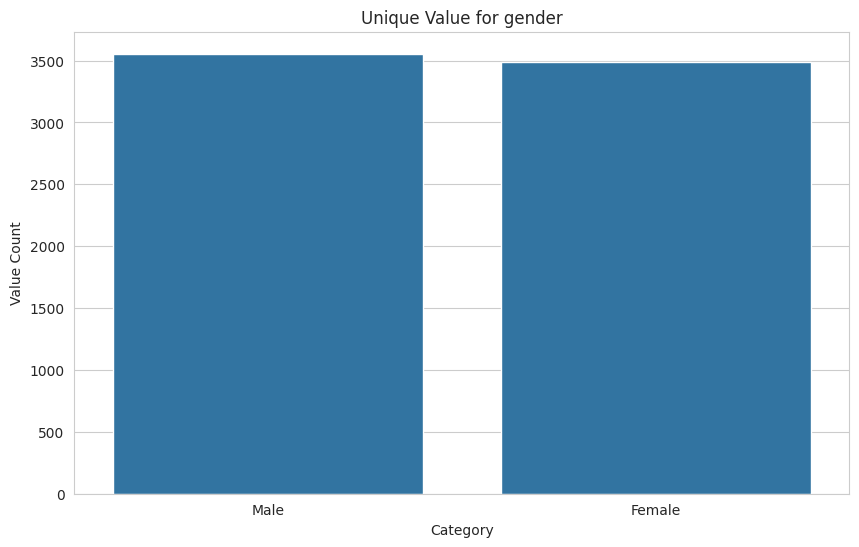

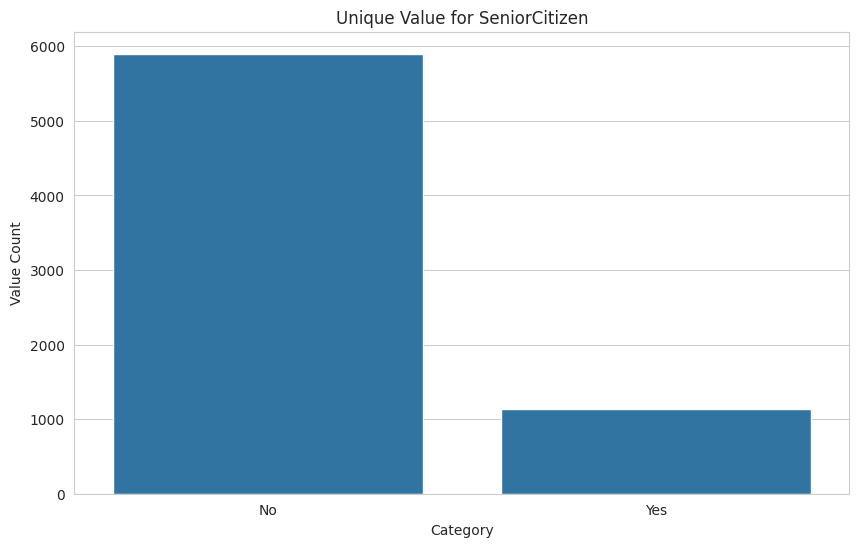

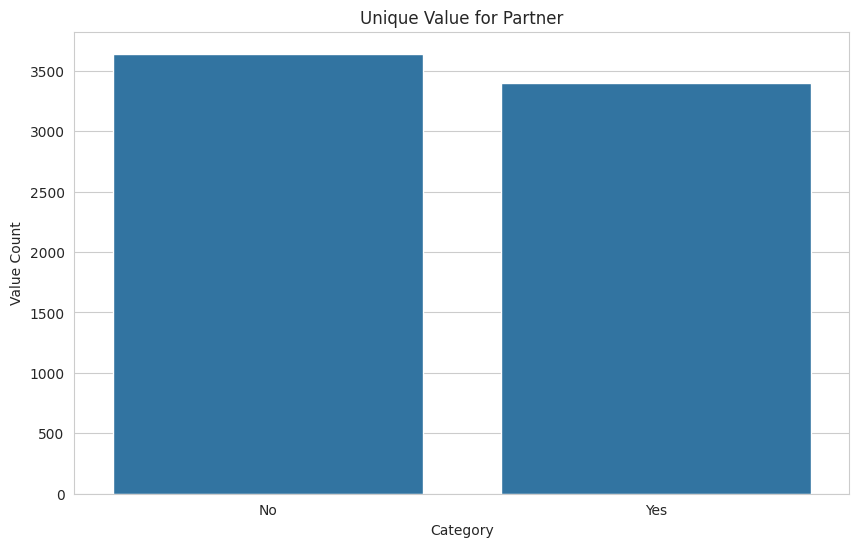

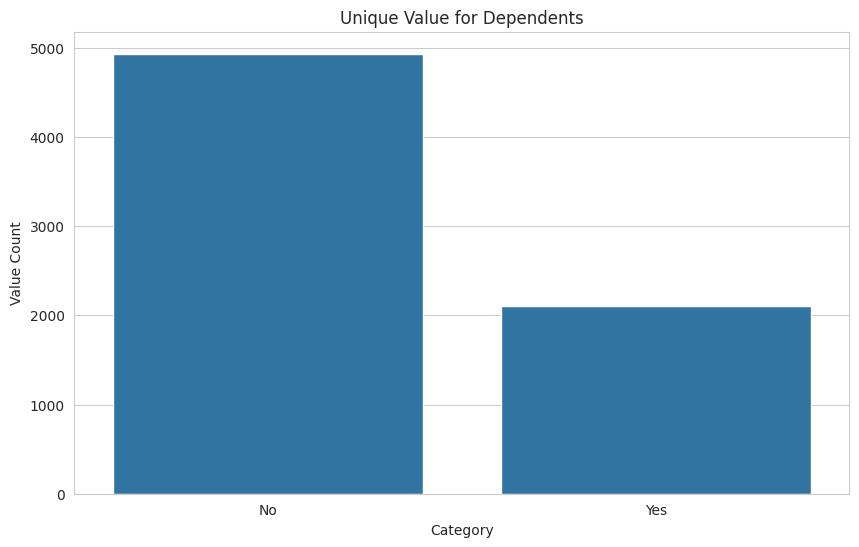

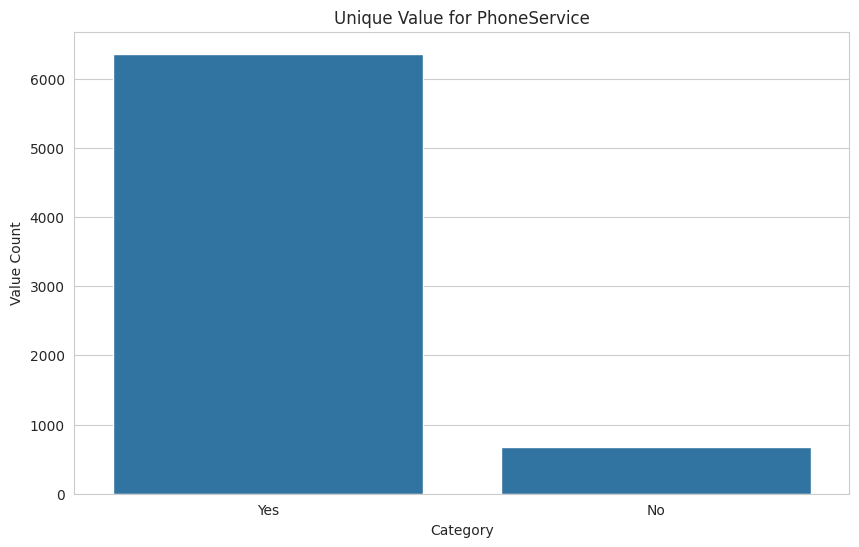

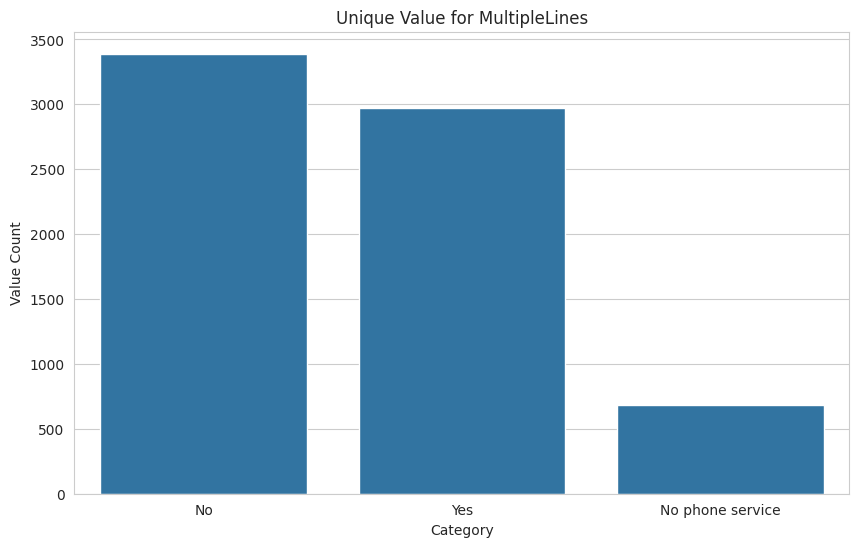

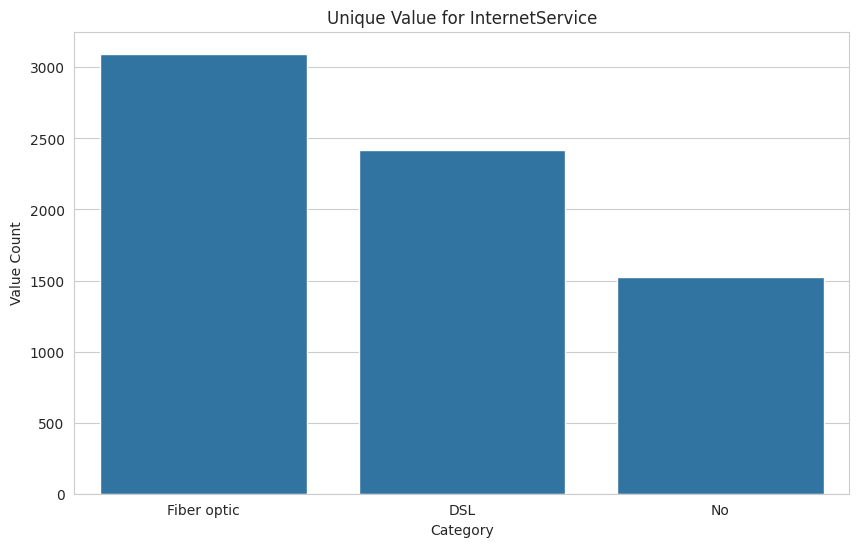

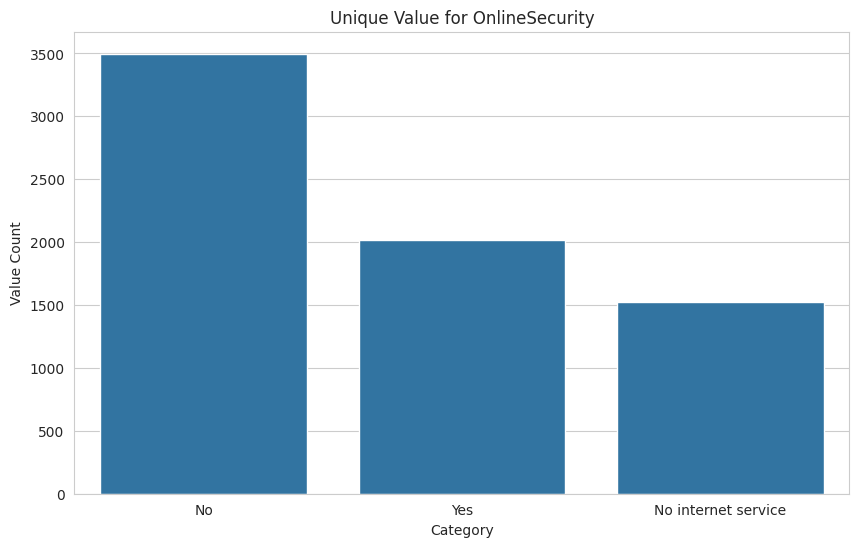

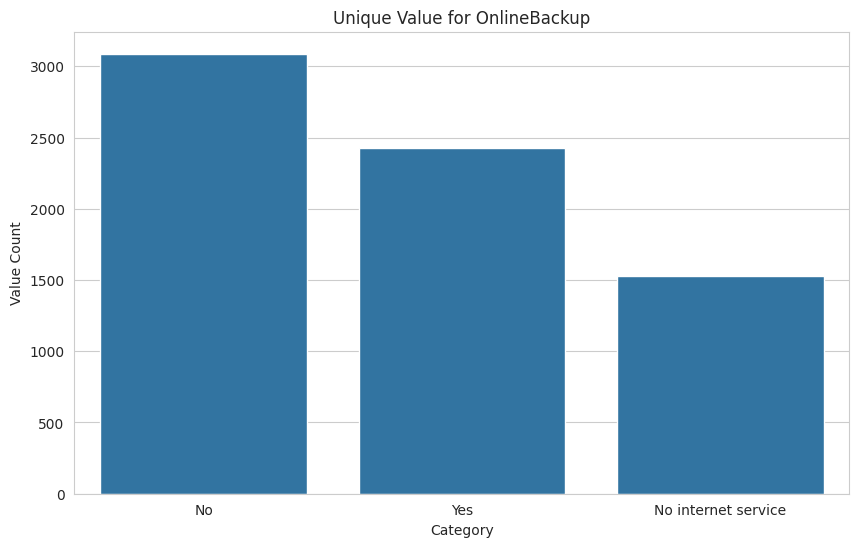

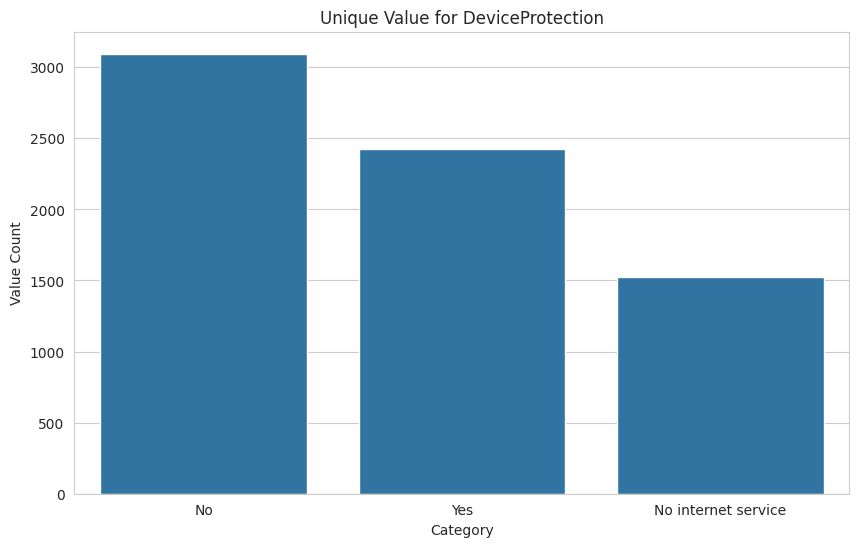

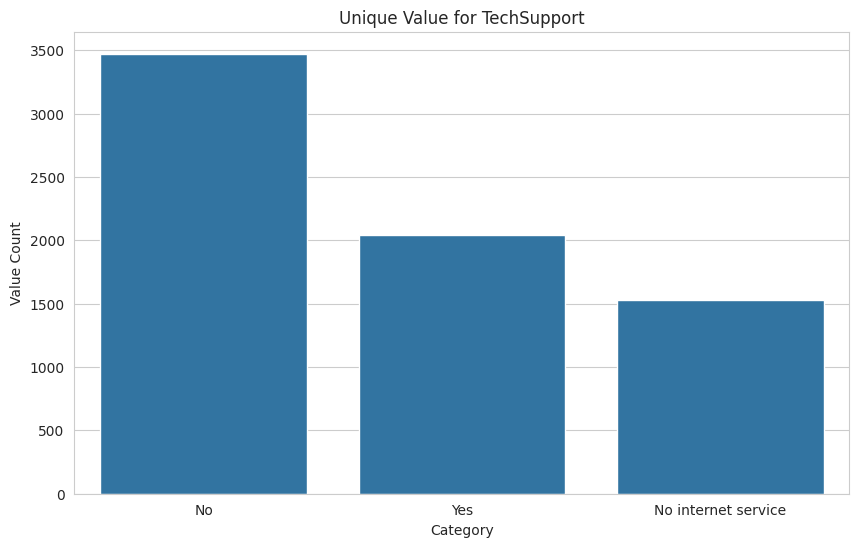

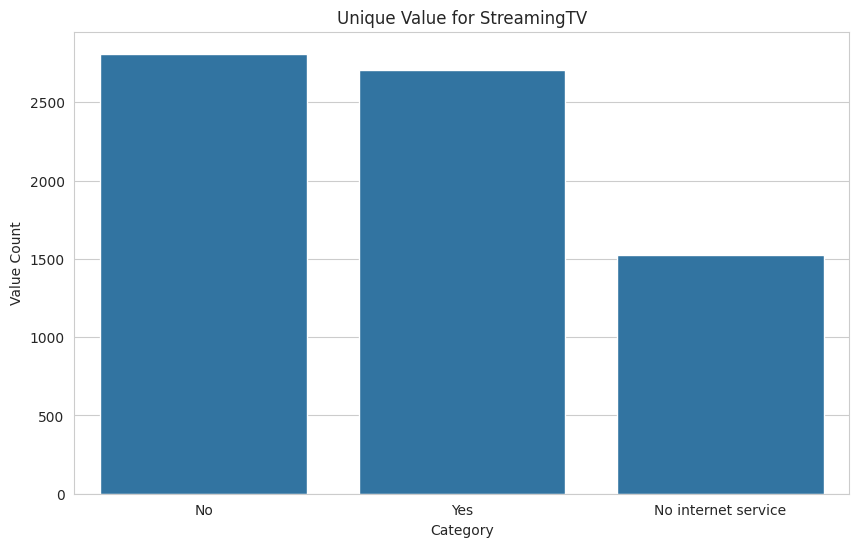

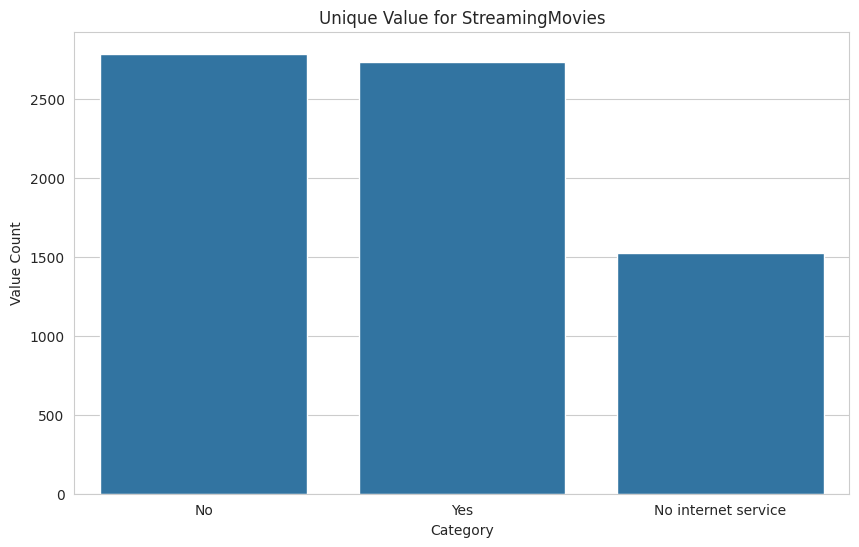

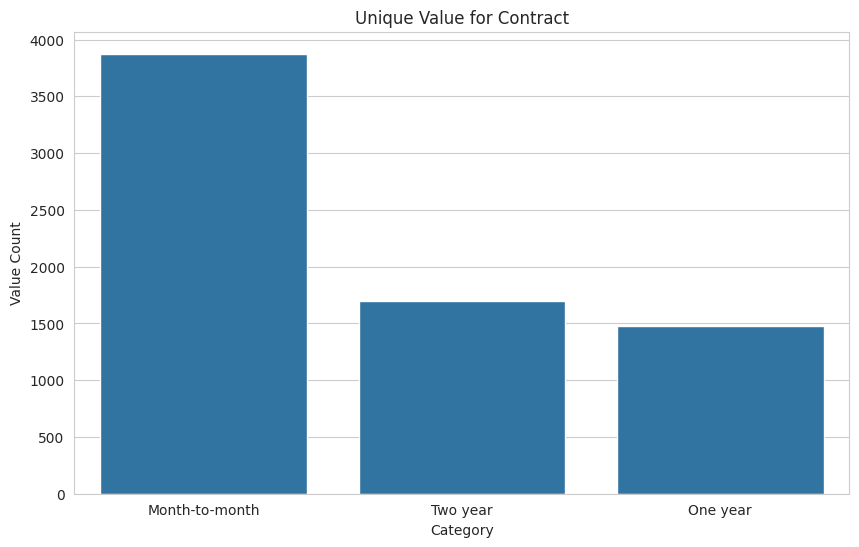

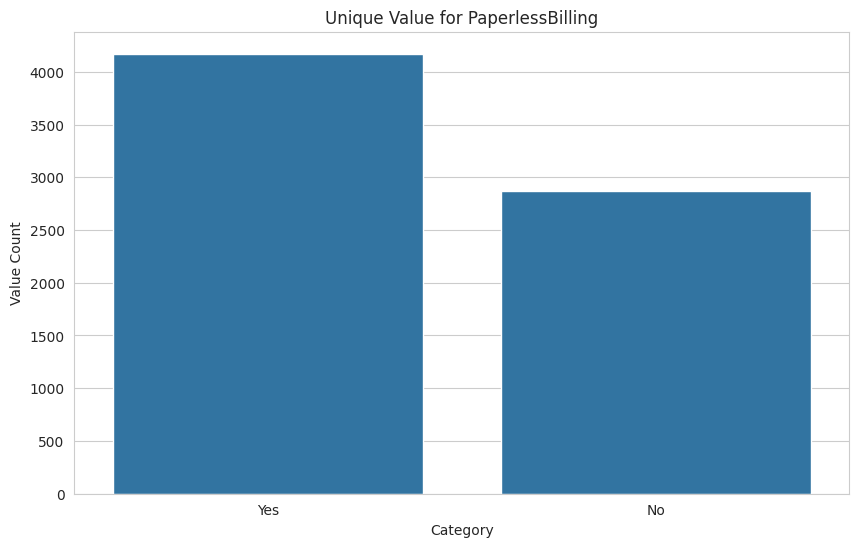

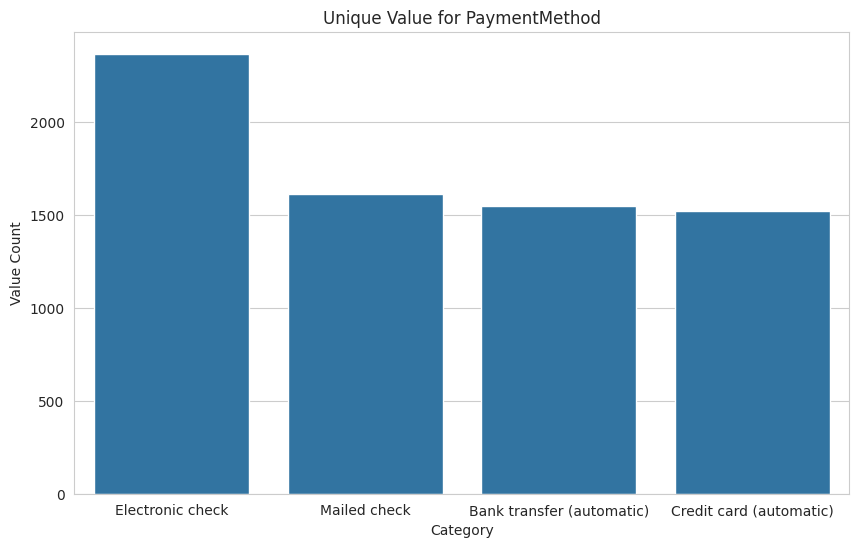

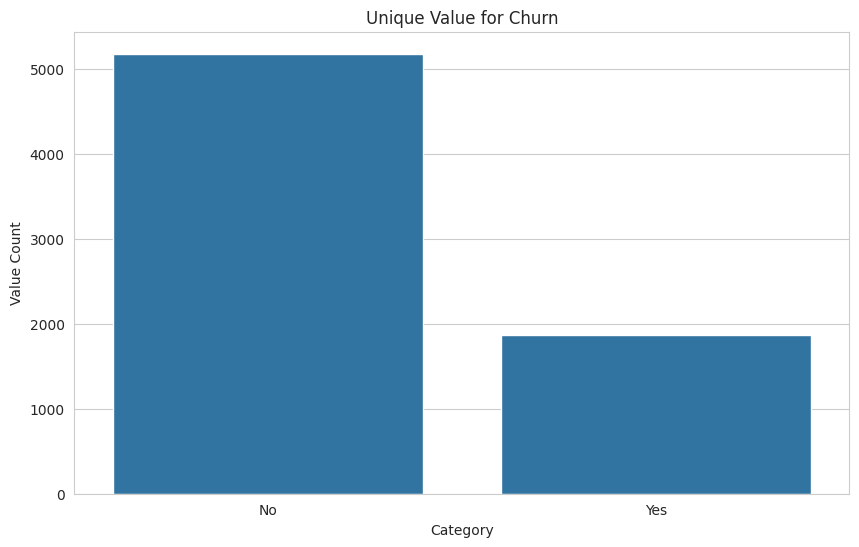

In [33]:
# Plotting bar graphs for each categorical column
import os
import matplotlib.pyplot as plt
import seaborn as sns

FIGPATH = '/content/Figures'
os.makedirs(FIGPATH, exist_ok=True)

for column in catColumns:
  valueCount = df[column].value_counts()
  plt.figure(figsize = (10, 6))
  plt.title(f'Unique Value for {column}')
  plt.xlabel('Category')
  plt.ylabel('Value Count')
  sns.barplot(x = valueCount.index, y = valueCount.values)
  plt.savefig(os.path.join(FIGPATH, f"Unique Value for {column}.png"))
  plt.show()

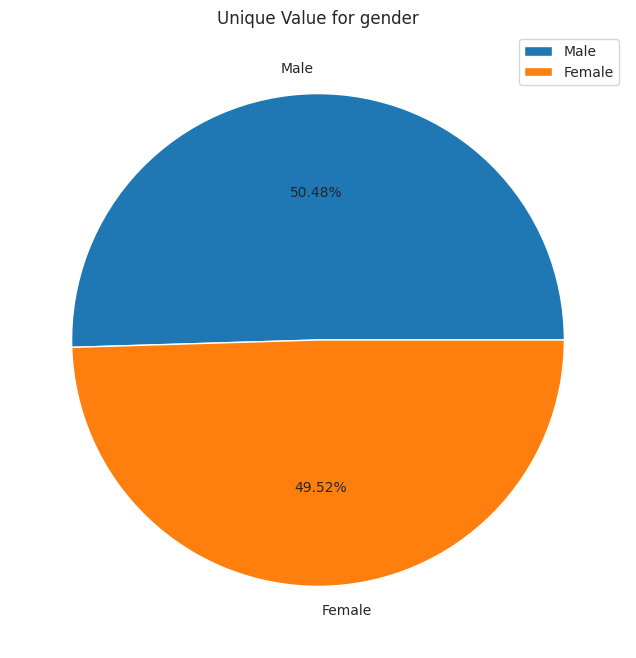

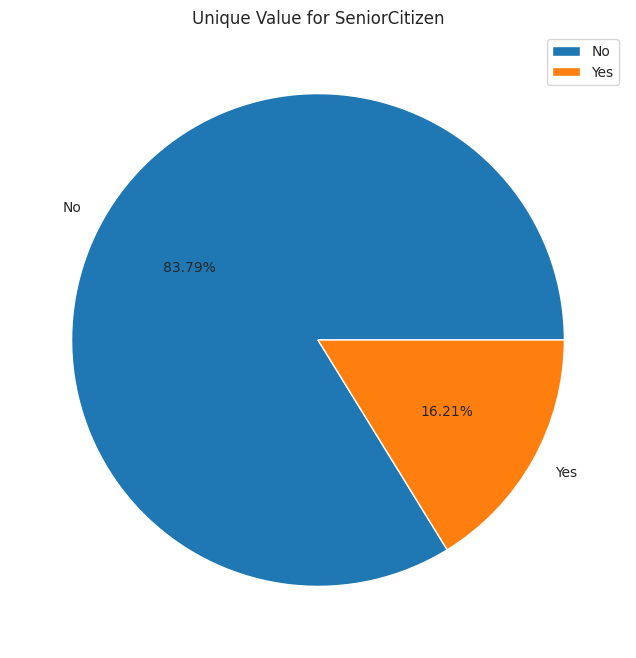

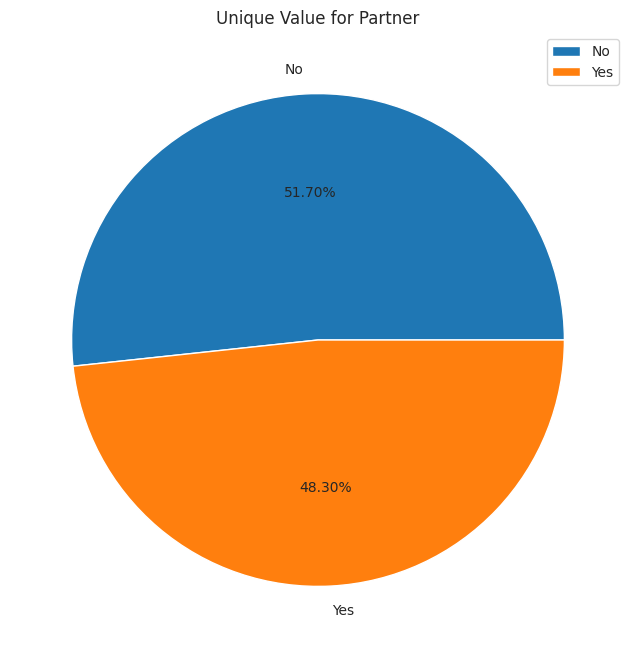

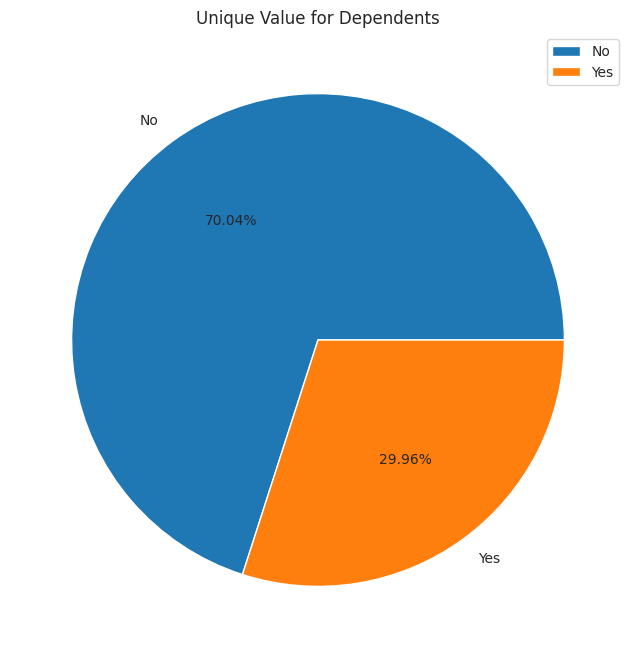

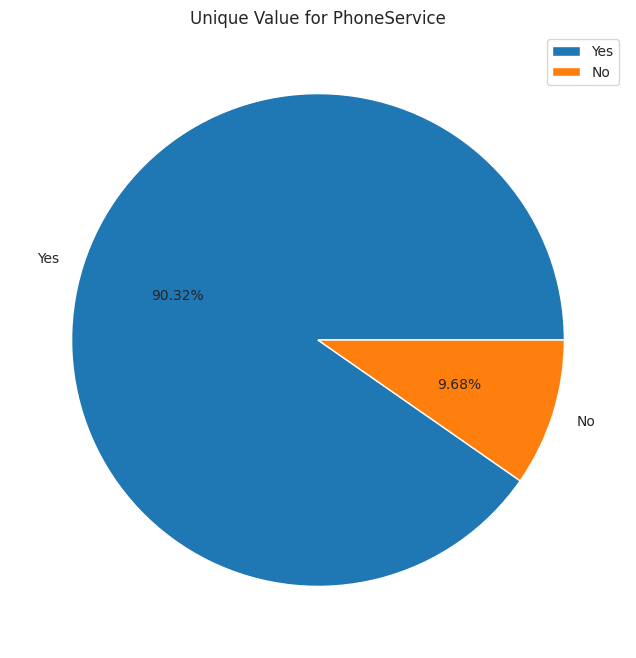

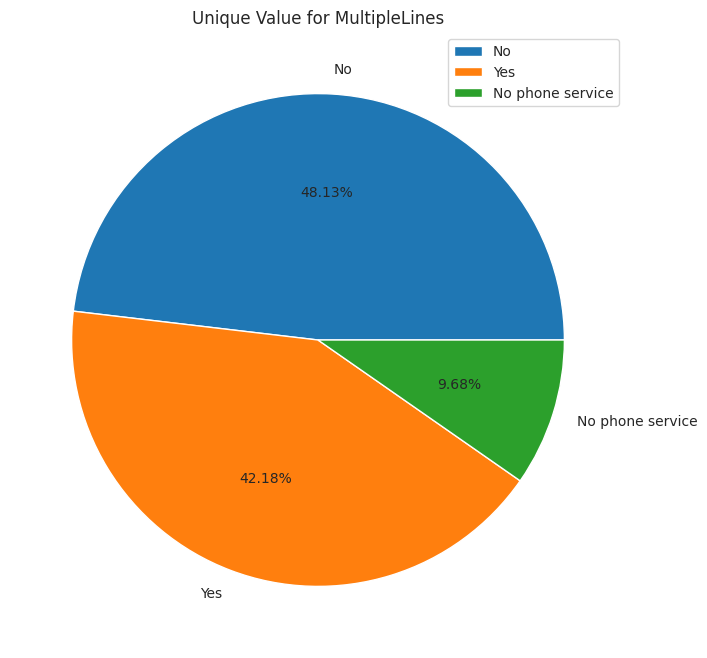

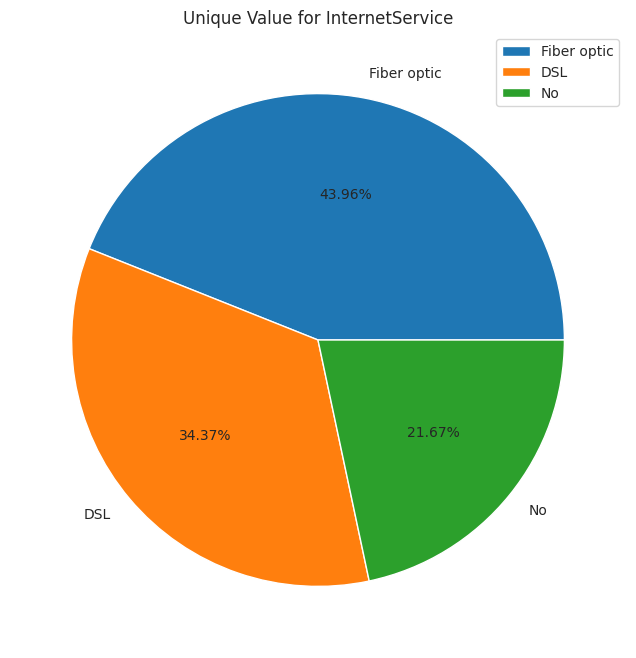

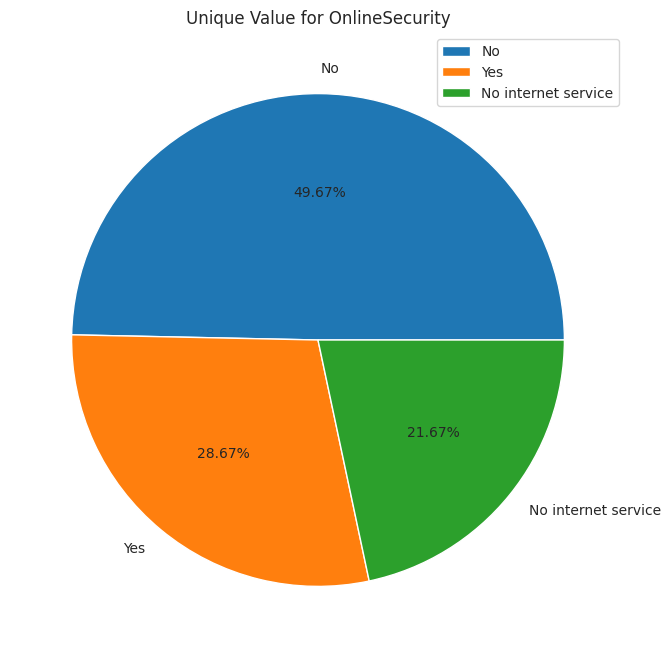

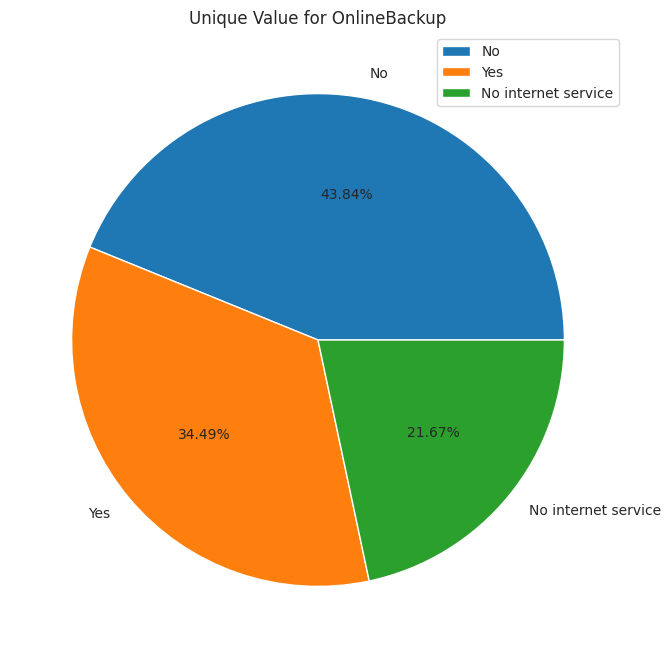

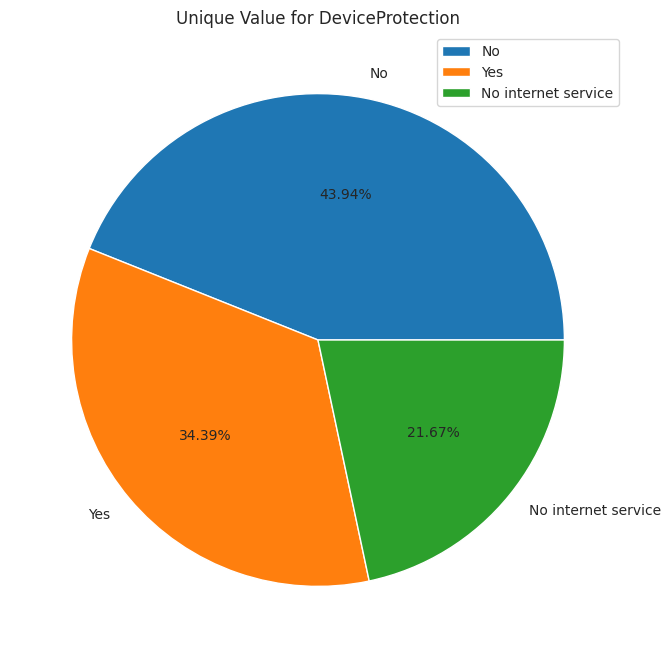

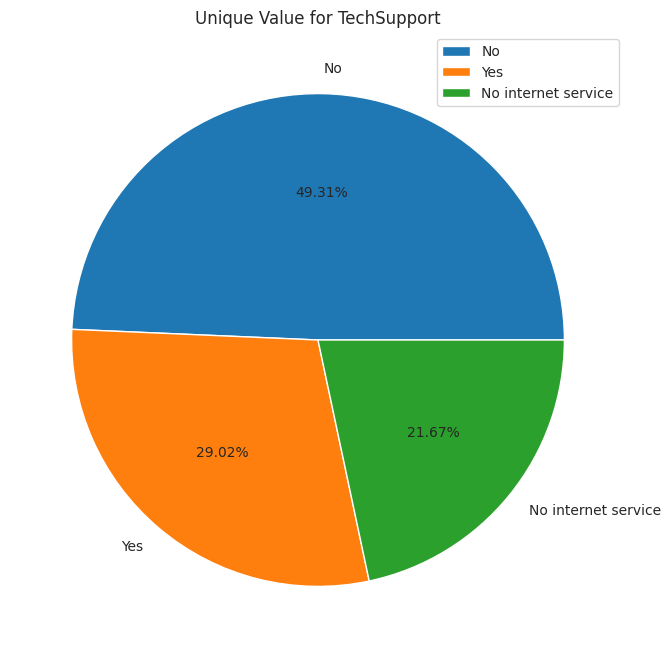

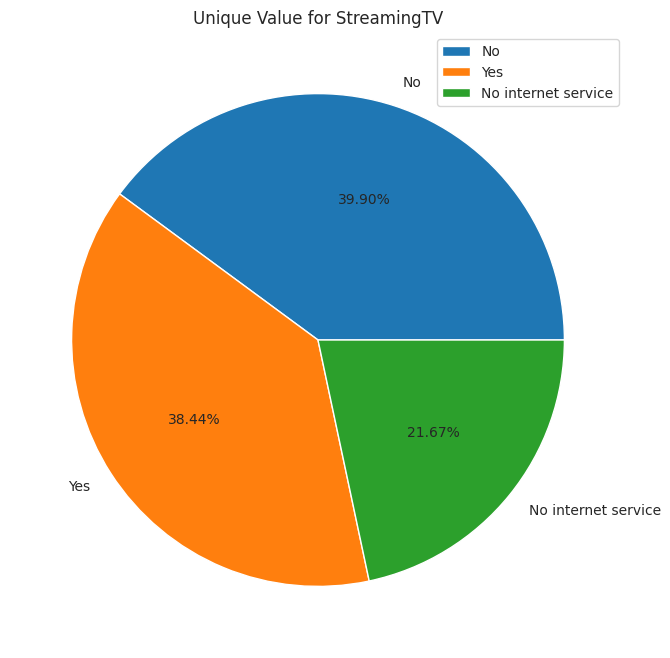

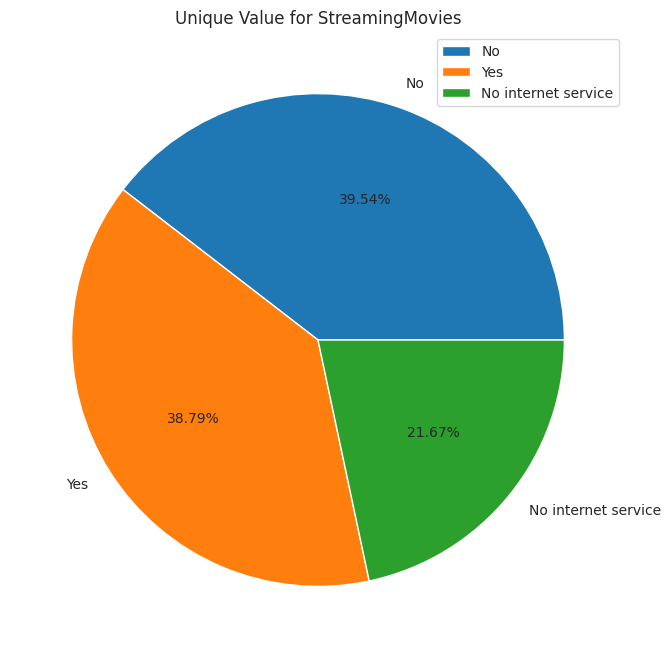

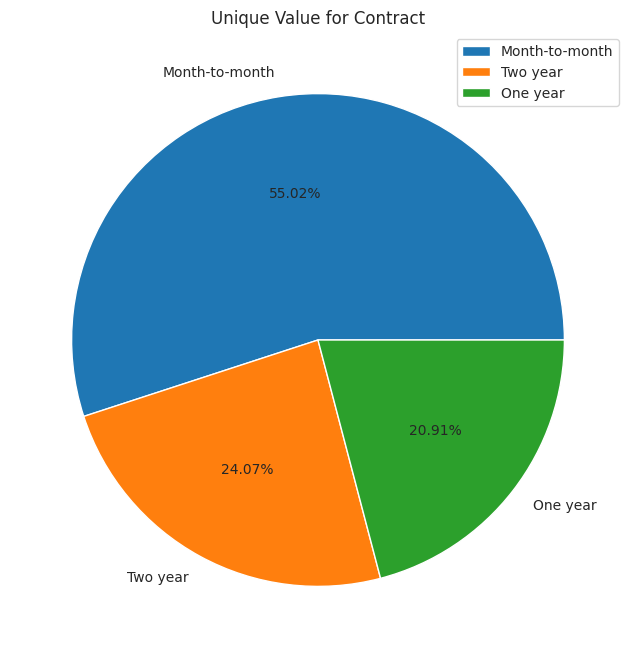

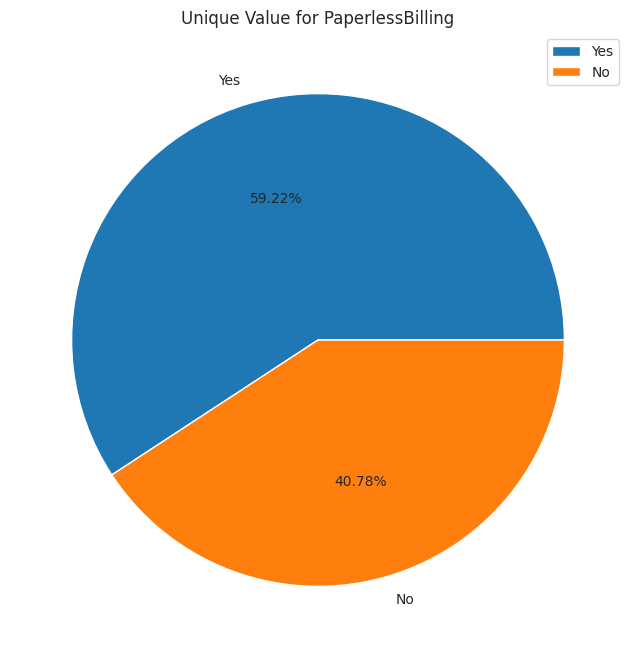

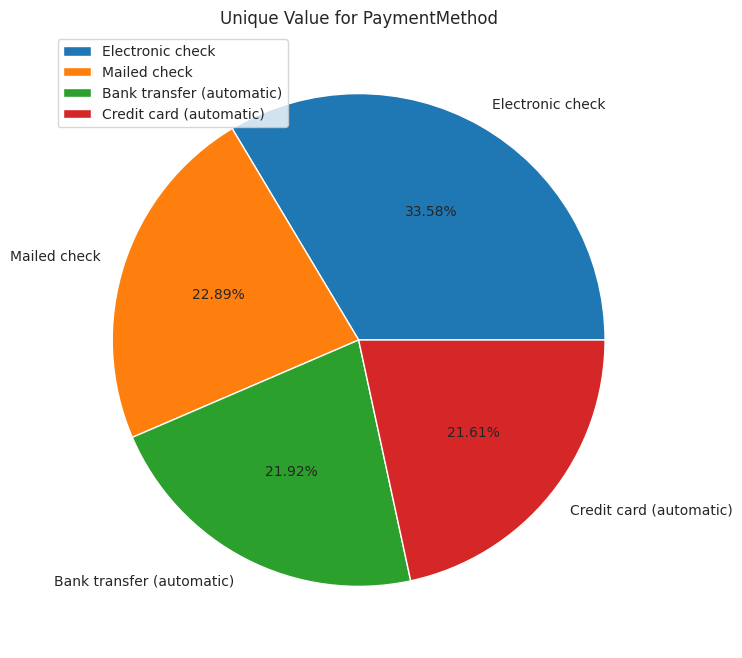

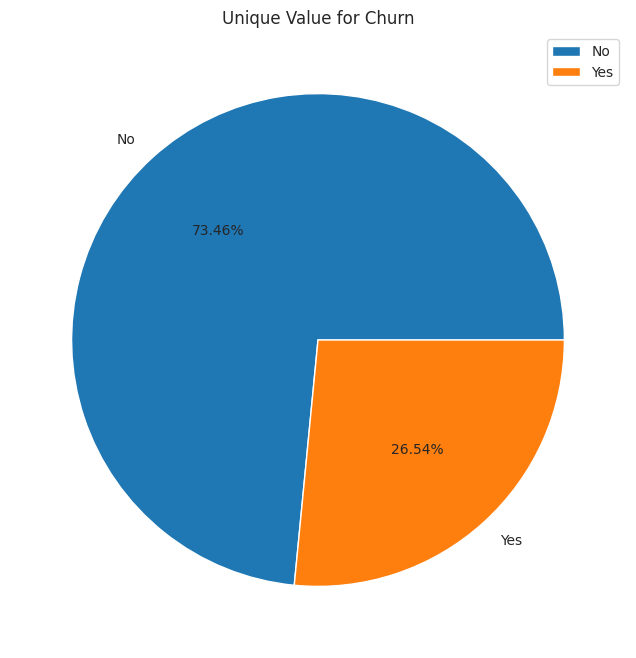

In [34]:
# Plotting pie graphs for each categorical column
for column in catColumns:
  valueCount = df[column].value_counts(normalize=True) * 100
  plt.figure(figsize = (8, 8))
  plt.title(f'Unique Value for {column}')
  plt.pie(labels = valueCount.index, x = valueCount.values, autopct = "%1.2f%%")
  plt.legend()
  plt.savefig(os.path.join(FIGPATH, f"Pie Chart for {column}.png"))
  plt.show()

* Approximately 50% of customers are men and, the other 50% are women.

* Approximately 16% of customers are Senior citizens.

* Approximately 51% of customers have a partner.

* Only 30% of the total customers have dependents.

* 90% of customers receive telephone service.

* Among the 90% who receive telephone service, 48% do not have more than one line.

* Approximately 70% have an internet service provider.

* Approximately 50% do not have an online security.

* Approximately 66% do not have an online backup.

* Most customers do not have device protection and tech support.

* Approximately 38% have streaming TV.

* Approximately 39% have streaming movie.

* Most customers have month-to-month contracts.

* Around 26.5% of customers have left the platform in the last month.

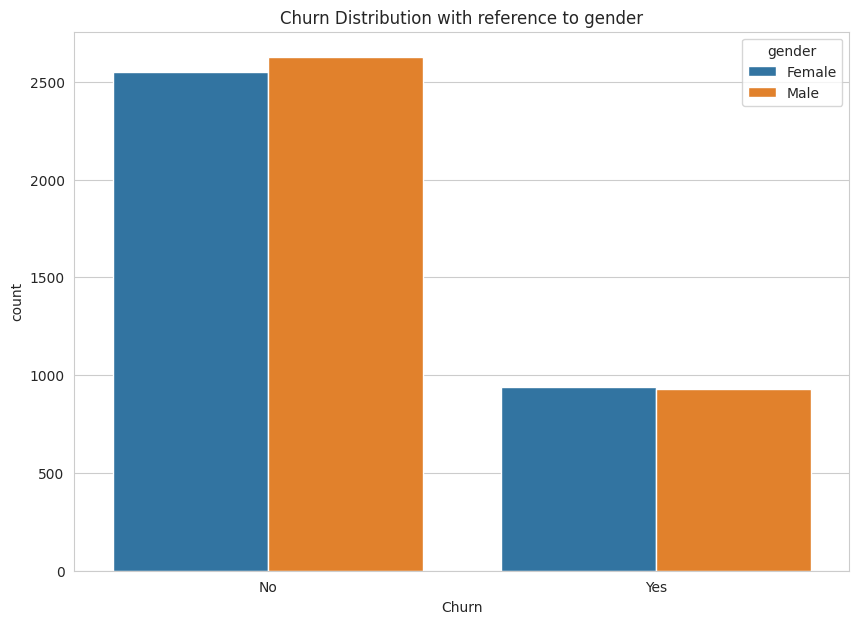

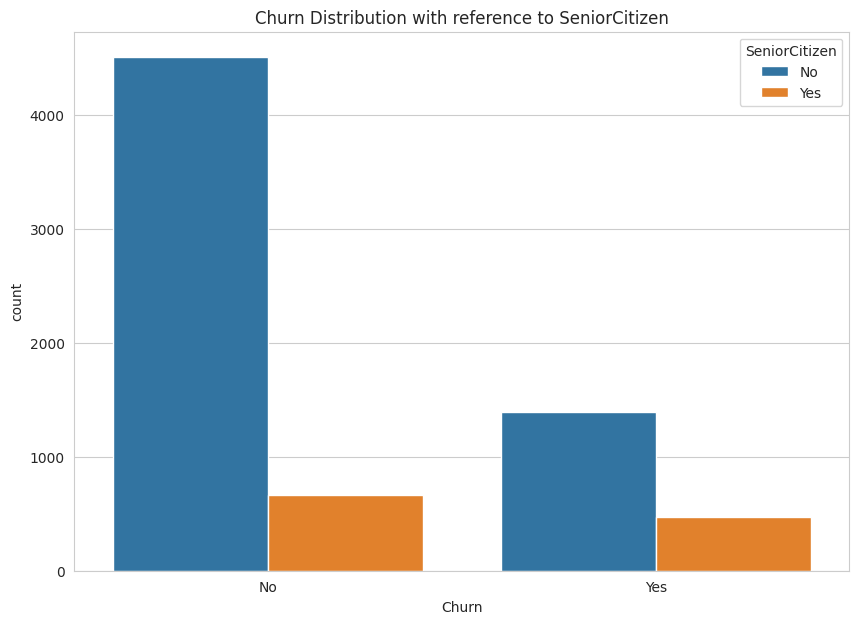

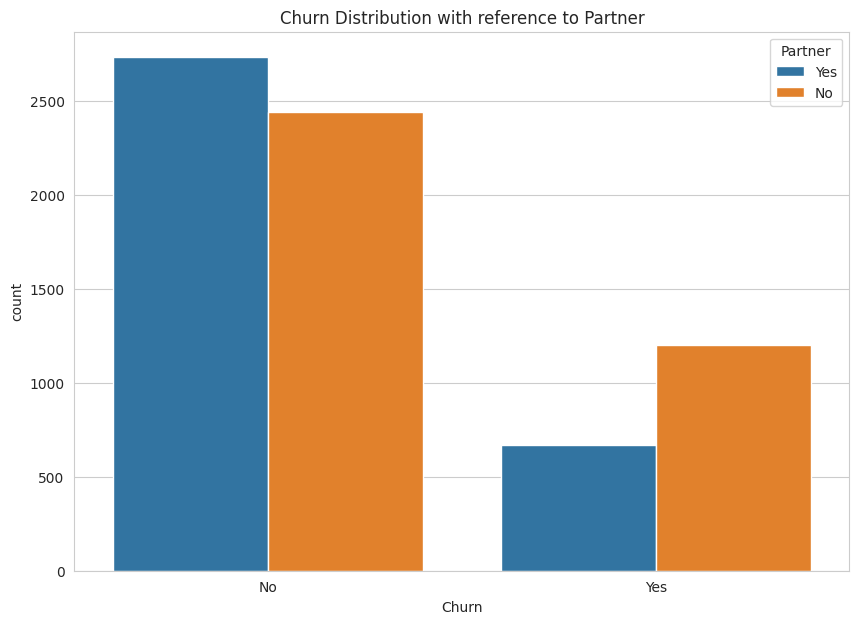

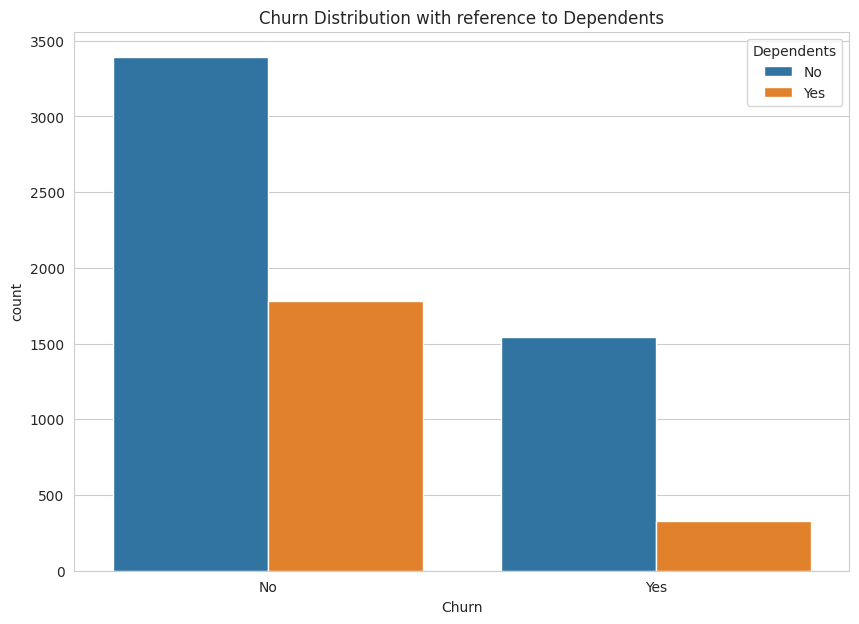

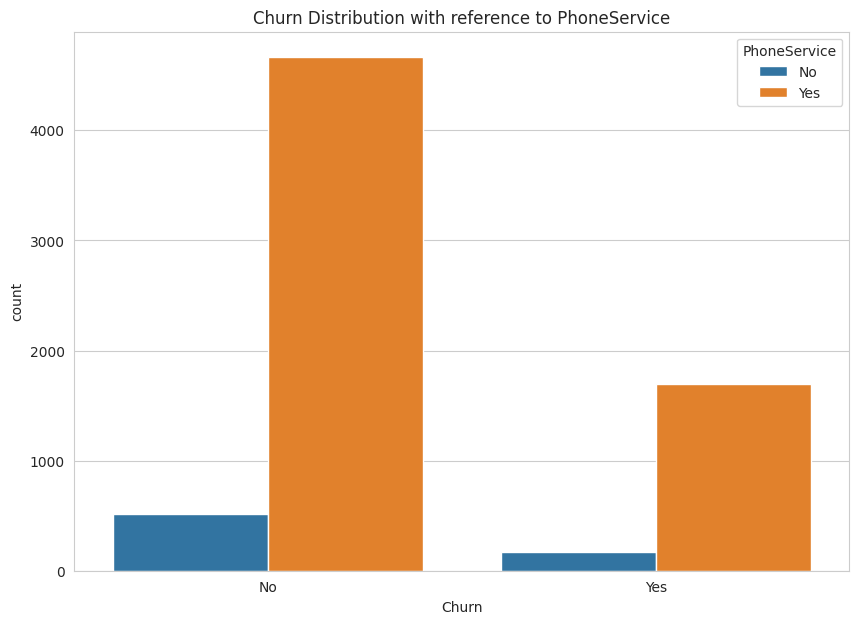

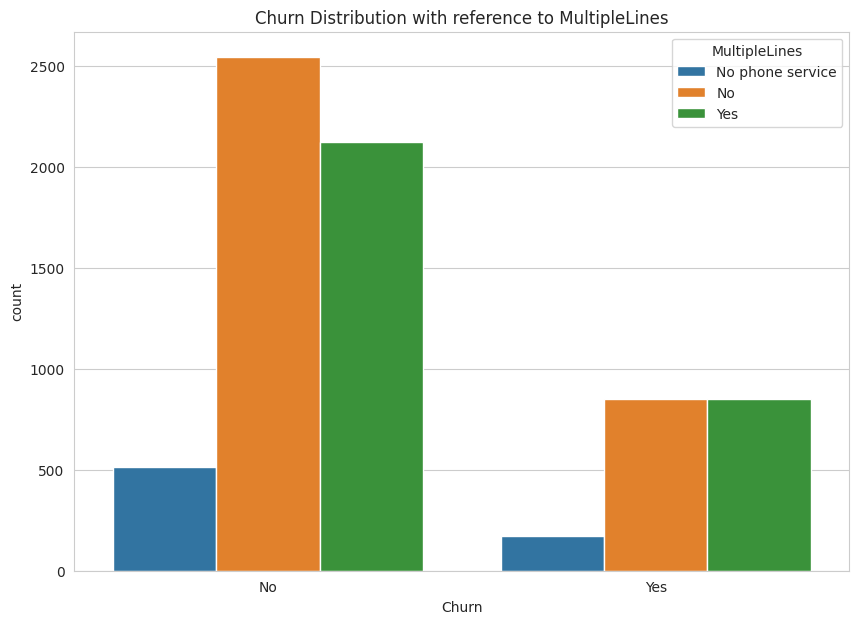

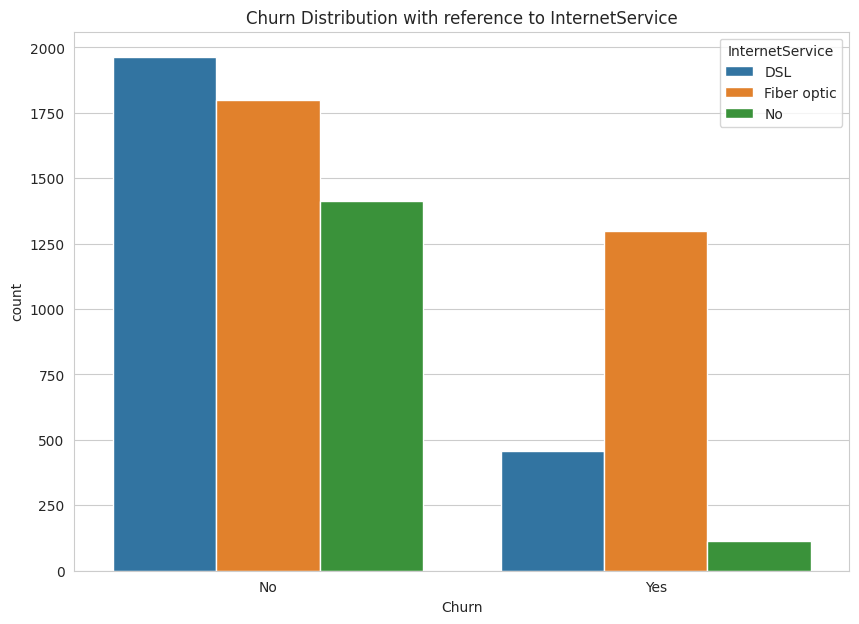

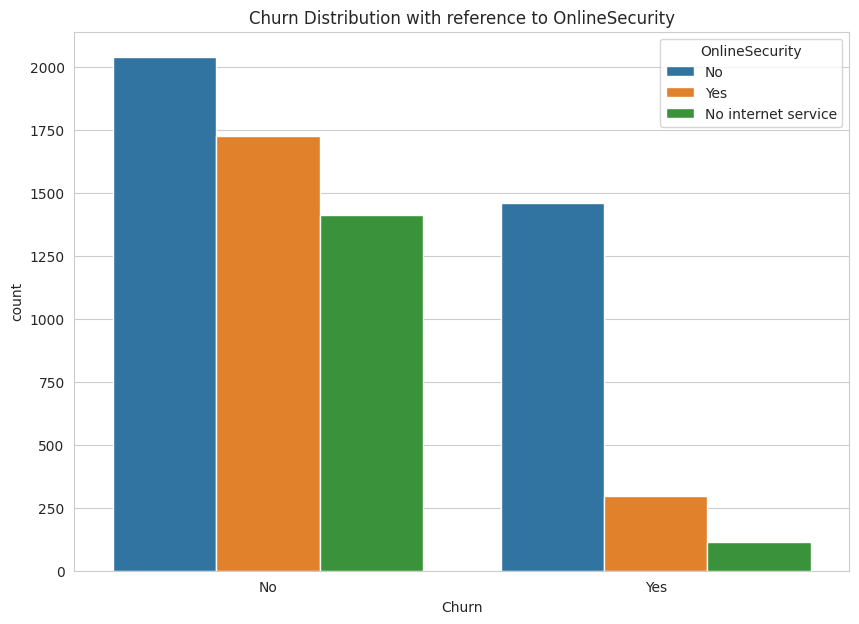

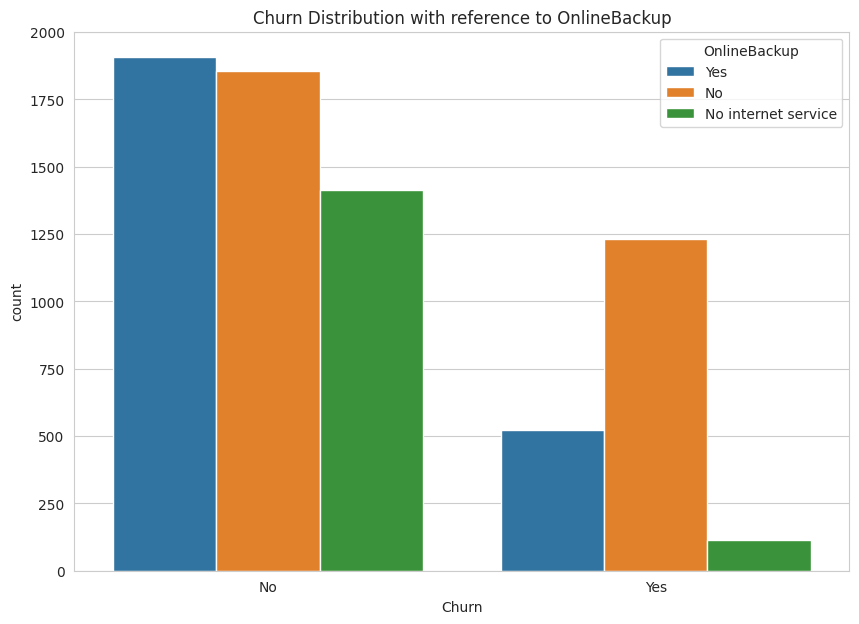

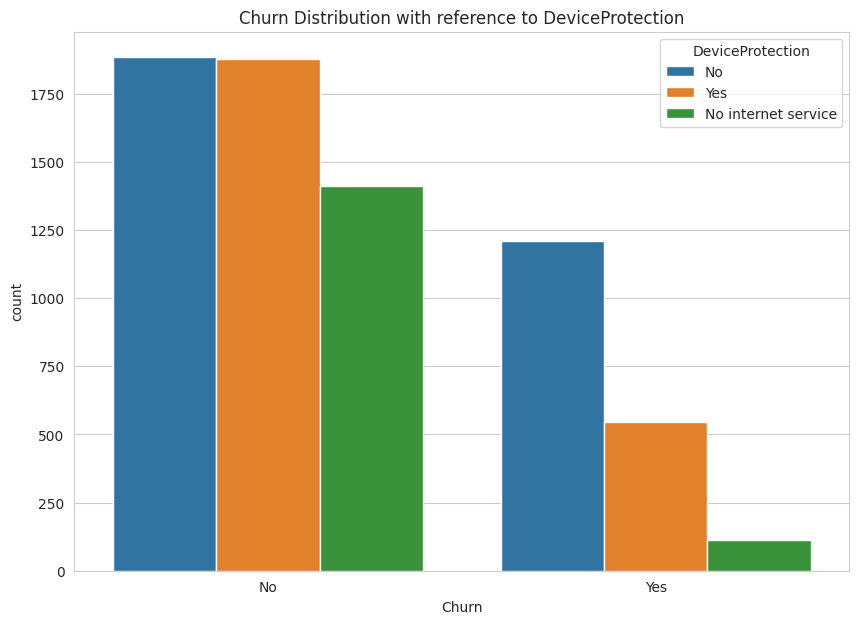

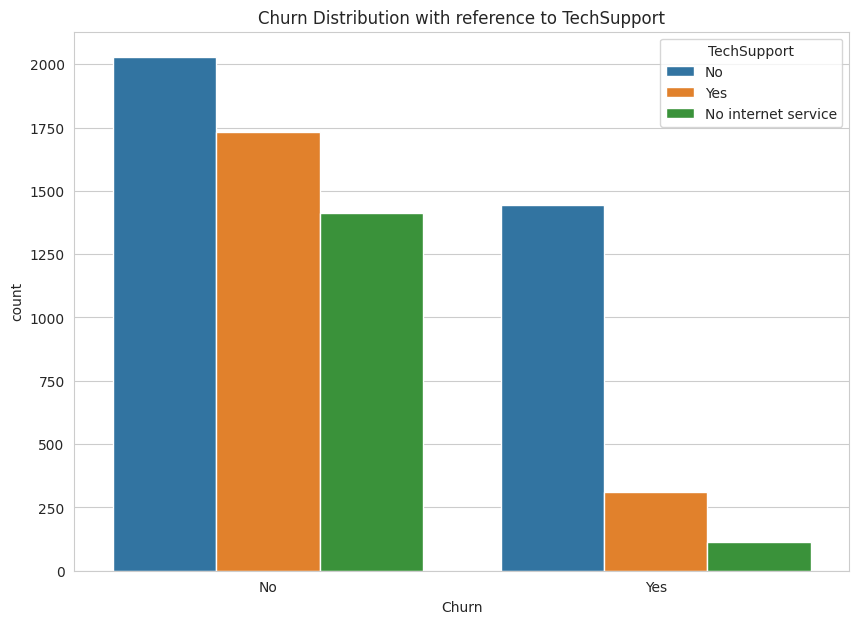

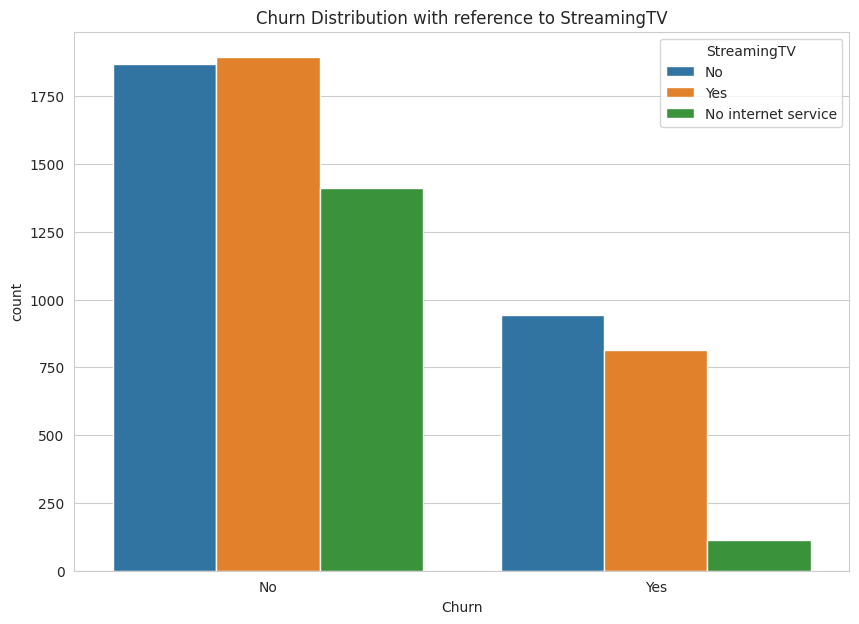

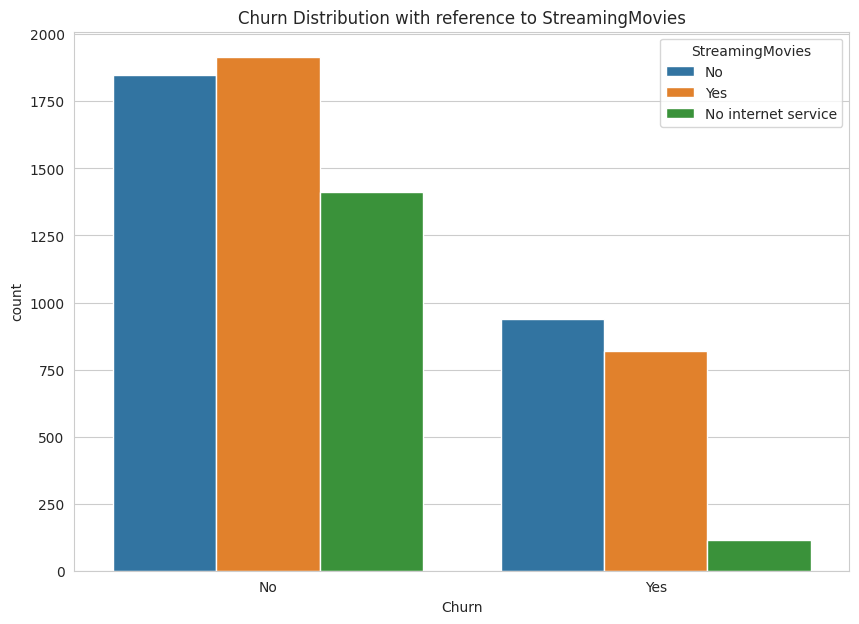

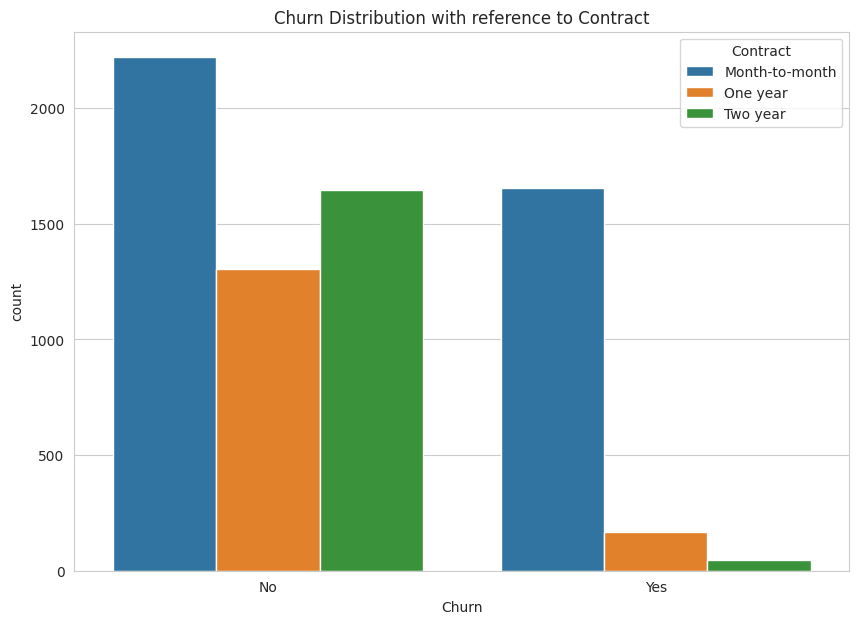

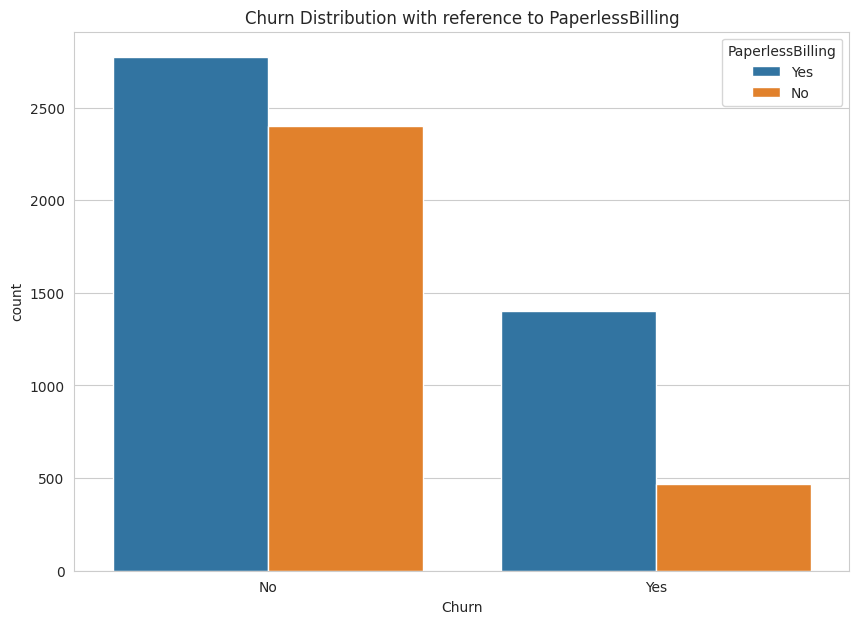

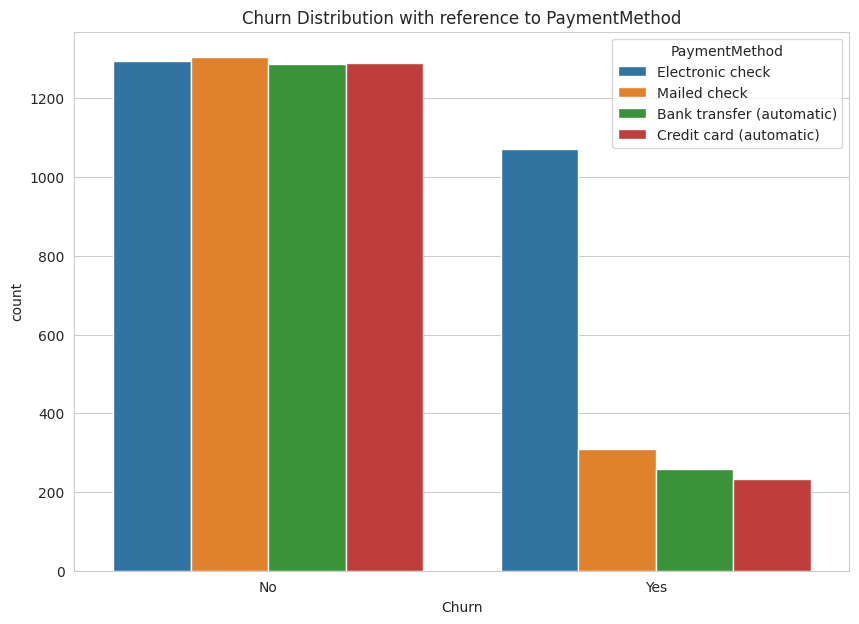

In [35]:
for column in catColumns:
  if column in ['Churn']:
    continue
  plt.figure(figsize = (10, 7))
  sns.countplot(data =df, x="Churn", hue=column)
  plt.title(f"Churn Distribution with reference to {column}")
  plt.savefig(os.path.join(FIGPATH, f"Churn Distribution with reference to {column}.png"))
  plt.show()

* There are no such relation between churn and gender.

* Those younger customers have a higher churn rate.

* Customers without partners or dependents have a high churn rate.

* Customers with phone service have a high churn rate.

* Customers without phone service have a high churn rate.

* Churn rate is higher in customers with Fiber Optic Internet Services.

* Customers without internet security, online backup, device protection have a high churn rate.

* Customers without streming movie or streaming TV have a high churn rate.

* Those with monthly contract have a higher churn rate.

* Those with take paperless bill have a higher churn rate.

* Customers with Electronic Check Payment Method tend to churn the platform more than with other options.


# **NUMERICAL VARIABLES ANALYSIS**

In [36]:
print(f"Numerical columns :  {list(numColumns)} \n")

Numerical columns :  ['TotalCharges', 'MonthlyCharges', 'tenure'] 



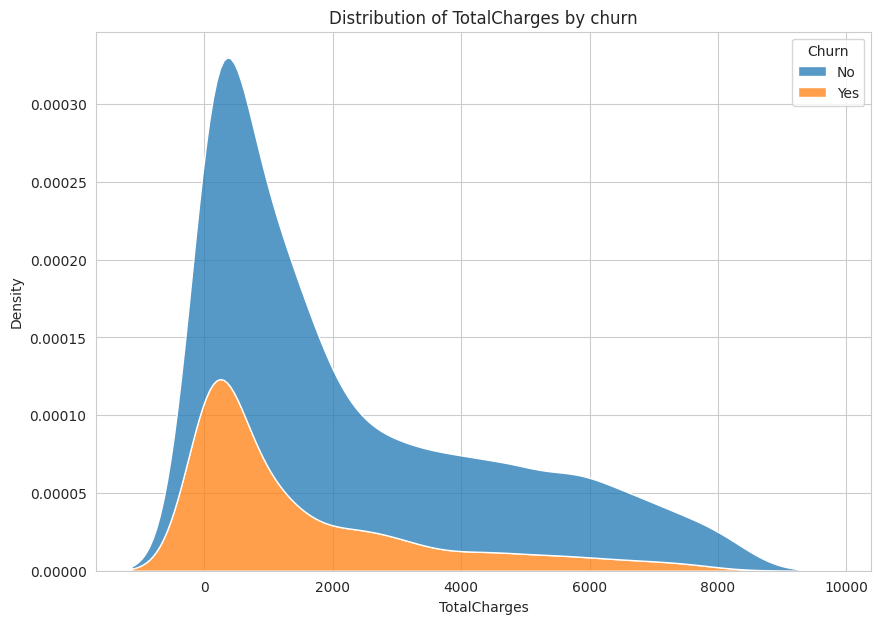

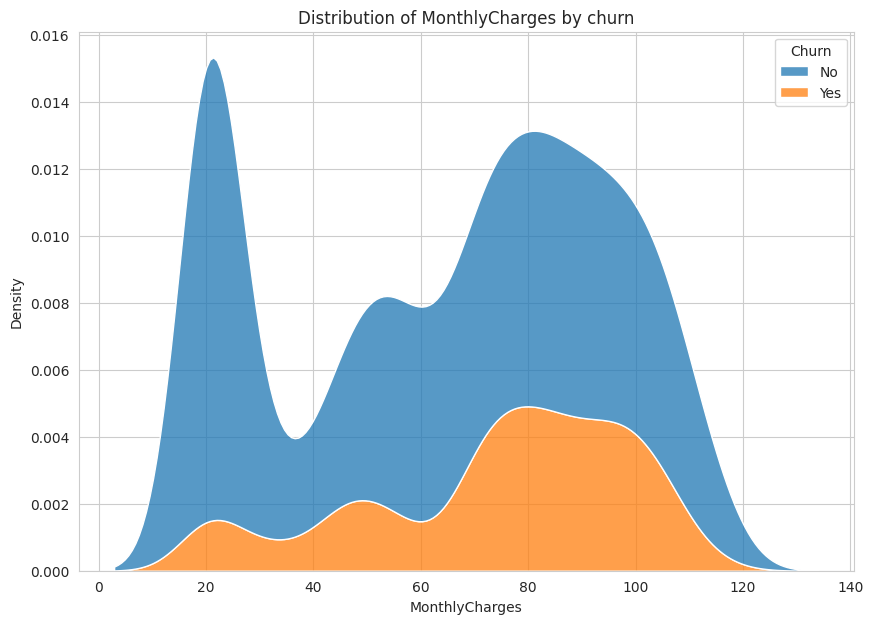

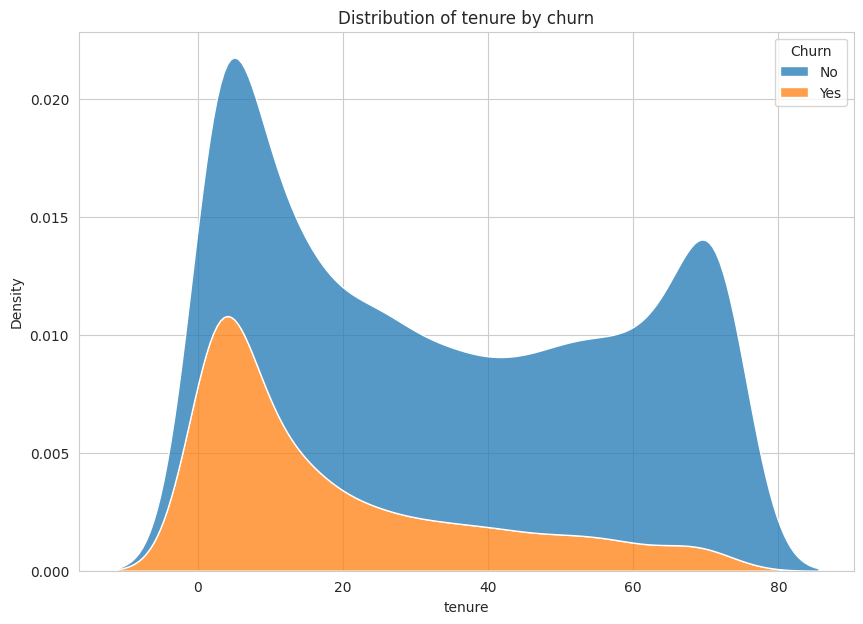

In [37]:
for column in numColumns:
  plt.figure(figsize = (10, 7))
  sns.kdeplot(data = df, x = column, hue="Churn", multiple="stack")
  plt.title(f"Distribution of {column} by churn")
  plt.savefig(os.path.join(FIGPATH, f"Distribution of {column} by churn.png"))
  plt.show()

* Customers with high charges are also more likely to churn.

* New customers has more probability to churn.

# **TEST NORMALITY DISTRIBUTION**



In [38]:
def plotQQ(df, column):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    plt.title(f"histogram for {column}")
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency')
    df[column].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[column],dist='norm',plot=lab)
    plt.show()

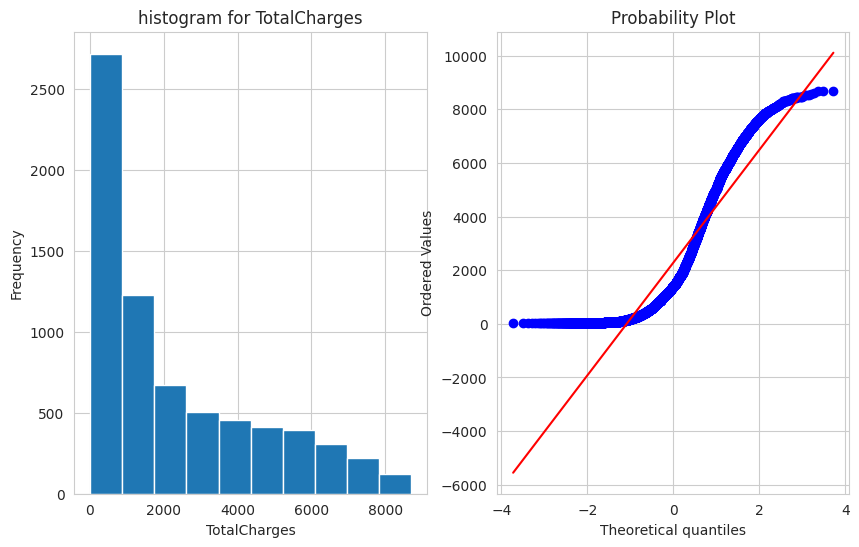

Shapiro Test for TotalCharges column
	 It does not look normally distributed (Reject H0)
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



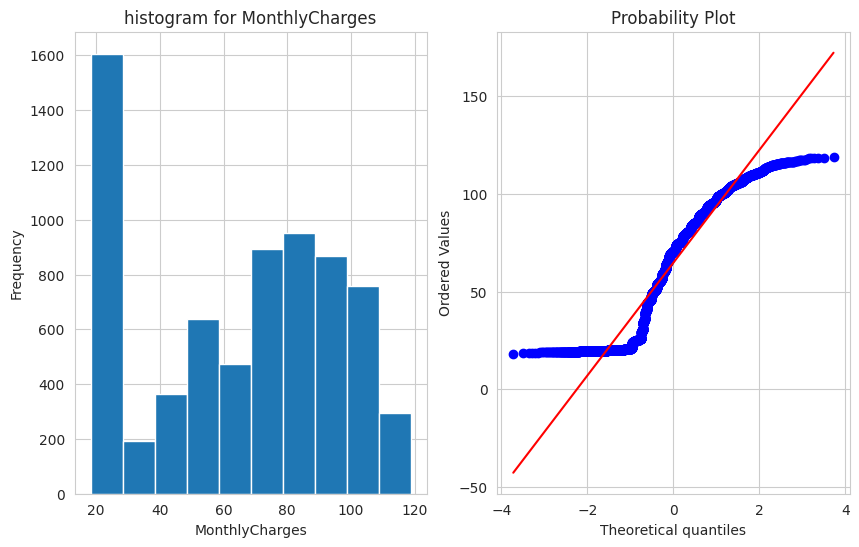

Shapiro Test for MonthlyCharges column
	 It does not look normally distributed (Reject H0)
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



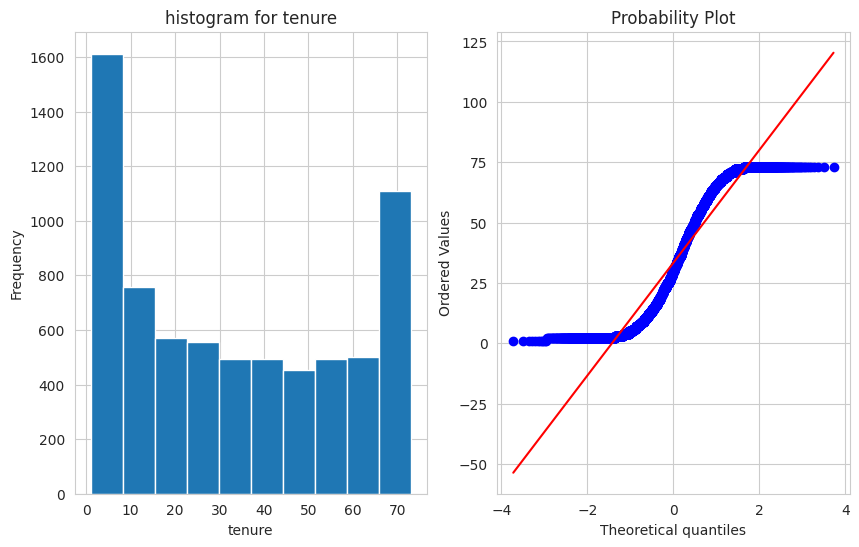

Shapiro Test for tenure column
	 It does not look normally distributed (Reject H0)
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



In [39]:
for column in numColumns:
  stat, p = stats.shapiro(df[column])
  plotQQ(df, column)
  print(f'Shapiro Test for {column} column')
  if p > 0.05:
    print(f'\t It normally distributed (Accept H0)')
  else:
    print(f'\t It does not look normally distributed (Reject H0)')
  print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")

Since we intend to construct a machine learning model using tree-based algorithms, there is no requirement to transform the data into a normal distribution

# **IDENTIFY OUTLIERS**

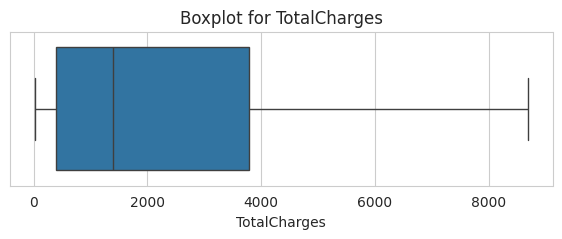

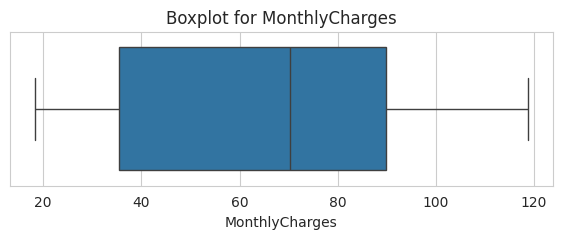

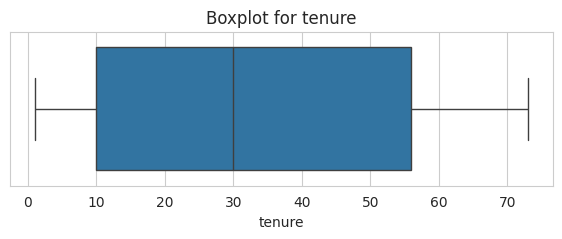

In [40]:
for column in numColumns:
  plt.figure(figsize = (7, 2))
  plt.title(f"Boxplot for {column}")
  sns.boxplot(data =df, x=column)
  plt.savefig(os.path.join(FIGPATH, f"Boxplot for {column}.png"))
  plt.show()

There are no outliers in the numerical columns, and thus, there is no need to treat or address them.

In [41]:
def handleOutliers(df, numColumns):
  for column in numColumns:
      q1 = df[column].quantile(0.25)
      q3 = df[column].quantile(0.75)
      IQR = q3 - q1
      upper = q3 + (1.5 * IQR)
      lower = q1 - (1.5 * IQR)
      df.loc[(df[column] > upper), i] = upper
      df.loc[(df[column] < lower), i] = lower

# **CORRELATION**

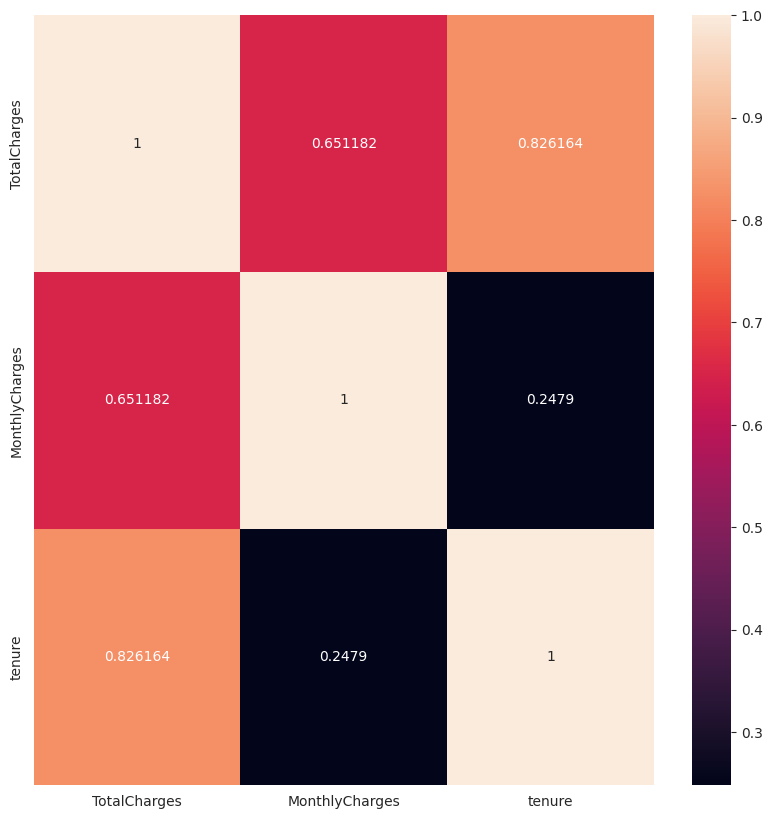

In [42]:
correlation = df[numColumns].corr()

plt.figure(figsize = (10, 10))
sns.heatmap(data = correlation, fmt ='g', annot=True)
plt.show()

TotalChargers is highly correlated with tenure.

# **FEATURE ENCODING**

In [43]:
for column in catColumns:
  print(f"\n{column} column contain :\n")
  print(f"{df[column].unique()}\n")
  print(f"{df[column].value_counts()}\n")
  print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------")


gender column contain :

['Female' 'Male']

gender
Male      3555
Female    3488
Name: count, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

SeniorCitizen column contain :

['No' 'Yes']

SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Partner column contain :

['Yes' 'No']

Partner
No     3641
Yes    3402
Name: count, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Dependents column contain :

['No' 'Yes']

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

---------------------------------------------------------------------------------

* 'gender', 'PaymentMethod', 'Contract', 'InternetService' columns need one hot encording.

* Other categorical columns need label encording.

* When there is no value in the 'Internet Service' column, it implies the absence of internet service, and all other features corresponding to no internet services can be inferred from the remaining columns.

* When there is no value in the 'Phone Service' column, it implies the absence of phone service, and all other features corresponding to no phone services can be inferred from the remaining columns.


* The variables "Streaming TV" and "Streaming Movies" exhibit similarity and have been combined into a consolidated variable named "StreamingService" to streamline the data without significant information loss.

* The variables "OnlineSecurity",	"OnlineBackup",	"DeviceProtection",	"TechSupport", exhibit similarity and have been combined into a consolidated variable named "OnlineService" to streamline the data without significant information loss.













In [44]:
print(f"Feature size to be encorded : {len(catColumns)}")
print(f"Features to be one hot encorded : {['gender', 'PaymentMethod', 'Contract', 'InternetService']}")
print(f"Feature size to be one hot encorded : {len(['gender', 'PaymentMethod', 'Contract', 'InternetService'])}")
print(f"Features to be label encorded : {set(catColumns) - set(['gender', 'PaymentMethod', 'Contract', 'InternetService'])}")
print(f"Feature size to be label encorded {len(list(set(catColumns) - set(['gender', 'PaymentMethod', 'Contract', 'InternetService'])))}")

Feature size to be encorded : 17
Features to be one hot encorded : ['gender', 'PaymentMethod', 'Contract', 'InternetService']
Feature size to be one hot encorded : 4
Features to be label encorded : {'Partner', 'StreamingTV', 'OnlineSecurity', 'PaperlessBilling', 'OnlineBackup', 'TechSupport', 'DeviceProtection', 'SeniorCitizen', 'PhoneService', 'MultipleLines', 'Dependents', 'StreamingMovies', 'Churn'}
Feature size to be label encorded 13


In [45]:
encordedDf = df[numColumns].copy()

In [46]:
encordedDf['SeniorCitizen'] = df['SeniorCitizen'].map({
    "No" : 0,
    "Yes" : 1,
})

In [47]:
encordedDf['Partner'] = df['Partner'].map({
    "No" : 0,
    "Yes" : 1,
})

In [48]:
encordedDf['Dependents'] = df['Dependents'].map({
    "No" : 0,
    "Yes" : 1,
})

In [49]:
encordedDf['PhoneService'] = df['PhoneService'].map({
    "No" : 0,
    "Yes" : 1,
})

In [51]:
encordedDf['MultipleLines'] = df['MultipleLines'].map({
    "No" : 0,
    "Yes" : 1,
  "No phone service" : 0
})

In [50]:
def encordService(data):
  if(data["OnlineSecurity"] == "Yes" or data['OnlineBackup'] == "Yes" or data['DeviceProtection'] == "Yes" or data['TechSupport'] == "Yes"):
    return 1
  else:
    return 0


encordedDf["OnlineService"] = df.apply(encordService, axis =1)

In [52]:
def encordedStreaming(data):
  if(data["StreamingTV"] == "Yes" or data['StreamingMovies'] == "Yes"):
    return 1
  else:
    return 0


encordedDf["StreamingService"] = df.apply(encordedStreaming, axis =1)

In [53]:
encordedDf['PaperlessBilling'] = df['PaperlessBilling'].map({
    "No" : 0,
    "Yes" : 1
  })

In [54]:
encordedDf['Churn'] = df['Churn'].map({
    "No" : 0,
    "Yes" : 1,
})

In [55]:
encordedDf.head()

TotalCharges  MonthlyCharges  tenure  SeniorCitizen  Partner  Dependents  \
0         29.85           29.85       2              0        1           0   
1       1889.50           56.95      35              0        0           0   
2        108.15           53.85       3              0        0           0   
3       1840.75           42.30      46              0        0           0   
4        151.65           70.70       3              0        0           0   

   PhoneService  OnlineService  MultipleLines  StreamingService  \
0             0              1              0                 0   
1             1              1              0                 0   
2             1              1              0                 0   
3             0              1              0                 0   
4             1              0              0                 0   

   PaperlessBilling  Churn  
0                 1      0  
1                 0      0  
2                 1      1  
3                 0      0  
4                 1      1

In [56]:
print(f"encordedDf shape: {encordedDf.shape}")

encordedDf shape: (7043, 12)


In [ ]:
encordedDf = pd.concat([encordedDf, df[['gender', 'PaymentMethod', 'Contract', 'InternetService']]], axis = 1)

In [57]:
encordedDf.head()

TotalCharges  MonthlyCharges  tenure  SeniorCitizen  Partner  Dependents  \
0         29.85           29.85       2              0        1           0   
1       1889.50           56.95      35              0        0           0   
2        108.15           53.85       3              0        0           0   
3       1840.75           42.30      46              0        0           0   
4        151.65           70.70       3              0        0           0   

   PhoneService  OnlineService  MultipleLines  StreamingService  \
0             0              1              0                 0   
1             1              1              0                 0   
2             1              1              0                 0   
3             0              1              0                 0   
4             1              0              0                 0   

   PaperlessBilling  Churn  
0                 1      0  
1                 0      0  
2                 1      1  
3                 0      0  
4                 1      1

In [58]:
print(f"encordedDf shape: {encordedDf.shape}")

encordedDf shape: (7043, 12)


In [60]:
encordedDf = pd.get_dummies(data = df, columns =['gender', 'PaymentMethod', 'Contract', 'InternetService'], drop_first=True)

In [61]:
encordedDf.head()

SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines  \
0            No     Yes         No       2           No  No phone service   
1            No      No         No      35          Yes                No   
2            No      No         No       3          Yes                No   
3            No      No         No      46           No  No phone service   
4            No      No         No       3          Yes                No   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport  ... TotalCharges  \
0             No          Yes               No          No  ...        29.85   
1            Yes           No              Yes          No  ...      1889.50   
2            Yes          Yes               No          No  ...       108.15   
3            Yes           No              Yes         Yes  ...      1840.75   
4             No           No               No          No  ...       151.65   

  Churn gender_Male  PaymentMethod_Credit card (automatic)  \
0    No       False                                  False   
1    No        True                                  False   
2   Yes        True                                  False   
3    No        True                                  False   
4   Yes       False                                  False   

   PaymentMethod_Electronic check PaymentMethod_Mailed check  \
0                            True                      False   
1                           False                       True   
2                           False                       True   
3                           False                      False   
4                            True                      False   

   Contract_One year  Contract_Two year  InternetService_Fiber optic  \
0              False              False                        False   
1               True              False                        False   
2              False              False                        False   
3               True              False                        False   
4              False              False                         True   

   InternetService_No  
0               False  
1               False  
2               False  
3               False  
4               False  

[5 rows x 24 columns]

In [62]:
print(f"encordedDf shape: {encordedDf.shape}")

encordedDf shape: (7043, 24)


In [63]:
print(f"Columns of encoreddf : {encordedDf.columns}")

Columns of encoreddf : Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No'],
      dtype='object')


# **TRAIN / TEST SPLIT**

In [64]:
X = encordedDf.drop(columns =['Churn'], axis = 1)
y = encordedDf[['Churn']]

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (7043, 23)
y shape: (7043, 1)


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.76, random_state = 6, shuffle=True)

In [66]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (5352, 23)
X_test shape: (1691, 23)
y_train shape: (5352, 1)
y_test shape: (1691, 1)


# **SCALING THE DATA**

The numeric features need standard scaling to bring them to same distribution scale.

In [67]:
scalar = StandardScaler()
scalar.fit(X_train[numColumns])

StandardScaler()

In [68]:
X_train_sc = pd.DataFrame(scalar.transform(X_train[numColumns]), columns= numColumns, index=X_train[numColumns].index)
X_test_sc = pd.DataFrame(scalar.transform(X_test[numColumns]), columns= numColumns, index=X_test[numColumns].index)

In [69]:
X_train.drop(columns=numColumns, inplace=True, axis=1)
X_test.drop(columns=numColumns, inplace=True, axis=1)

In [70]:
X_train = pd.concat([X_train, X_train_sc], axis=1)
X_test = pd.concat([X_test, X_test_sc], axis=1)

In [72]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (5352, 23)
X_test shape: (1691, 23)
y_train shape: (5352, 1)
y_test shape: (1691, 1)


# **SOLVE IMBALANCED**

Churn
No       3917
Yes      1435
Name: count, dtype: int64


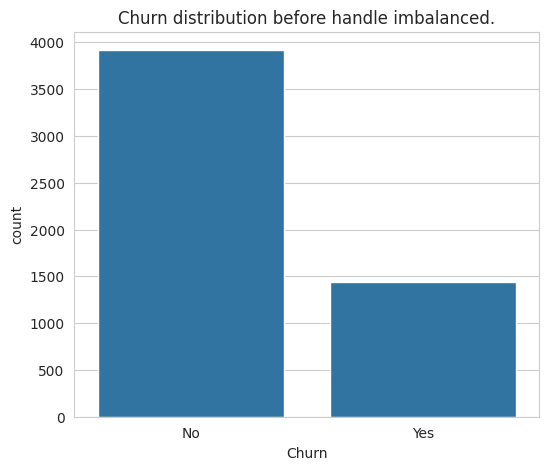

Total observations = 5352


In [73]:
print(y_train.value_counts())
plt.figure(figsize=(6, 5))
plt.title(f"Churn distribution before handle imbalanced.")
sns.countplot(data = y_train, x= 'Churn')
plt.show()

print(f"Total observations = {len(y_train.index)}")

In [74]:
def getCount(y, yBalanced):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  plt.title(f"Churn distribution before handle imbalanced.")
  sns.countplot(data = y, x= 'Churn')
  plt.subplot(1,2,2)
  plt.title(f"Churn distribution after handle imbalanced.")
  sns.countplot(data = yBalanced, x= 'Churn')
  plt.show()

  print(f"Total observations before {len(y.index)}")
  print(f"Total observations after {len(yBalanced.index)}")

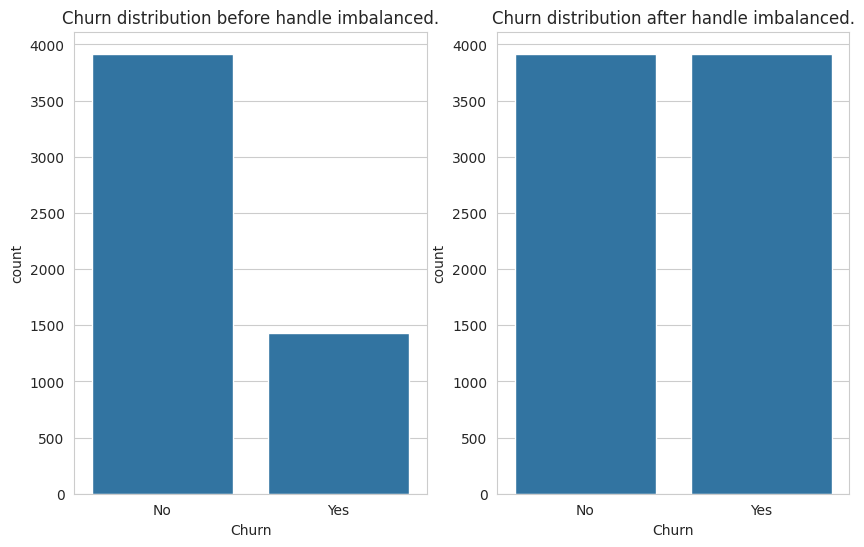

Total observations before 5352
Total observations after 7834


In [75]:
#RandomOverSampler
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

getCount(y_train, y_train_ros)

Class distribution before ADASYN:
 Churn
-1    5352
Name: count, dtype: int64
Skipping ADASYN: Only one class present in y_train['Churn'].


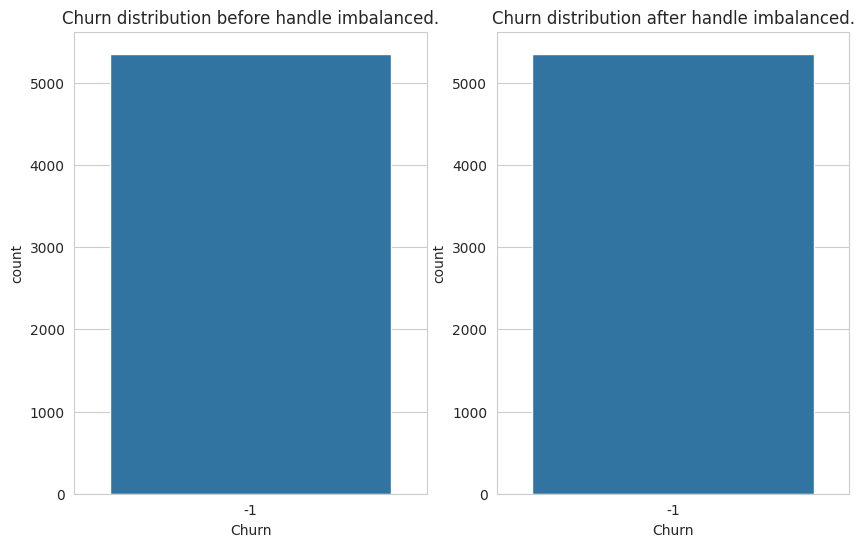

Total observations before 5352
Total observations after 5352


In [84]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import ADASYN

for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = LabelEncoder().fit_transform(X_train[col])

X_train = X_train.astype(float)

y_train['Churn'] = y_train['Churn'].map({'No': 0, 'Yes': 1}).fillna(-1).astype(int)

print("Class distribution before ADASYN:\n", y_train['Churn'].value_counts())

if y_train['Churn'].nunique() > 1:
    ad = ADASYN()
    X_train_ad, y_train_ad = ad.fit_resample(X_train, y_train['Churn'])
    print("Class distribution after ADASYN:\n", pd.Series(y_train_ad).value_counts())
else:
    print("Skipping ADASYN: Only one class present in y_train['Churn'].")
    X_train_ad, y_train_ad = X_train, y_train['Churn']

y_train_ad = pd.DataFrame(y_train_ad, columns=['Churn'])

getCount(y_train, y_train_ad)

Skipping SMOTE: Only one class present in y_train['Churn'].


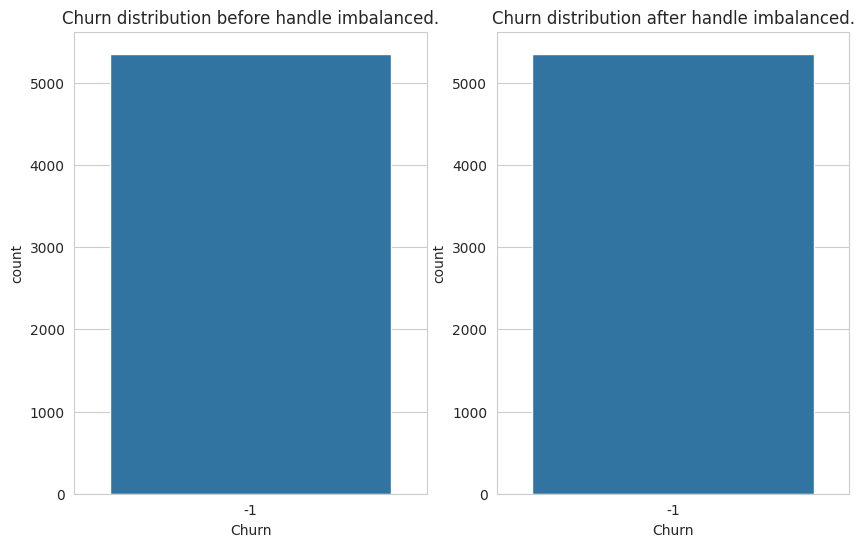

Total observations before 5352
Total observations after 5352


In [88]:
from imblearn.over_sampling import SMOTE
import pandas as pd

if y_train['Churn'].nunique() > 1:
    sm = SMOTE()
    X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train['Churn'])
    print("Class distribution after SMOTE:\n", pd.Series(y_train_sm).value_counts())
else:
    print("Skipping SMOTE: Only one class present in y_train['Churn'].")
    X_train_sm, y_train_sm = X_train, y_train['Churn']

y_train_sm = pd.DataFrame(y_train_sm, columns=['Churn'])

getCount(y_train, y_train_sm)

# **MODELLING**

In [89]:
def eveluating(model, X_test, y_test):
  y_pred = model.predict(X_test)
  y_pred_prob = model.predict_proba(X_test)[:, 1]

  print(f"{str(model)}")
  print(f"Classification report for testing data : ")
  print(classification_report(y_true=y_test, y_pred=y_pred))

  plt.figure(figsize=(6, 6))
  sns.heatmap(data = confusion_matrix(y_true=y_test, y_pred= y_pred), annot=True,fmt = "g",linecolor="k",linewidths=4)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title(f"Confussion Matrix for {str(model)}")
  plt.show()

  print(f"ROC AUC score = {roc_auc_score(y_test, y_pred_prob)}")
  print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")

In [90]:
def modelTraining(models, X_train, y_train, X_test, y_test):
  for model in models:
    model.fit(X_train, y_train)
    eveluating(model, X_test, y_test)

In [112]:
# model train with imbalanced data
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB(), KNeighborsClassifier(), SVC(probability = True), AdaBoostClassifier(), GradientBoostingClassifier(), XGBClassifier(), CatBoostClassifier()]


modelTraining(models, X_train, y_train, X_test, y_test)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: -1

In [102]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

# Define models
models = [
    LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(),
    GaussianNB(), KNeighborsClassifier(), SVC(probability=True),
    AdaBoostClassifier(), GradientBoostingClassifier(), XGBClassifier(),
    CatBoostClassifier()
]

# Convert all categorical columns in X_train_ros to numeric
for column in X_train_ros.columns:
    if X_train_ros[column].dtype == object:
        label_encoder = LabelEncoder()
        X_train_ros[column] = label_encoder.fit_transform(X_train_ros[column])

# Select only numerical features from X_train_ros
numerical_features = X_train_ros.select_dtypes(include=np.number).columns.tolist()
X_train_ros_numeric = X_train_ros[numerical_features]

# Convert y_train_ros['Churn'] to numeric before oversampling
y_train_ros['Churn'] = y_train_ros['Churn'].map({'No': 0, 'Yes': 1}).astype(int)

# Perform RandomOverSampler
ros = RandomOverSampler()
X_train_ros_balanced, y_train_ros_balanced = ros.fit_resample(X_train_ros_numeric, y_train_ros['Churn'])

# Convert y_train_ros_balanced to a Series and ensure it's integer type
y_train_ros_balanced = pd.Series(y_train_ros_balanced, name='Churn', dtype=int)

# Ensure y_test['Churn'] is also numeric before model training
y_test['Churn'] = y_test['Churn'].map({'No': 0, 'Yes': 1}).astype(int)

# Train the models
modelTraining(models, X_train_ros_balanced, y_train_ros_balanced, X_test, y_test)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Contract_One year
- Contract_Two year
- InternetService_Fiber optic
- InternetService_No
- PaymentMethod_Credit card (automatic)
- ...


LogisticRegression()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1257
           1       0.48      0.79      0.60       434

    accuracy                           0.73      1691
   macro avg       0.70      0.75      0.70      1691
weighted avg       0.80      0.73      0.75      1691



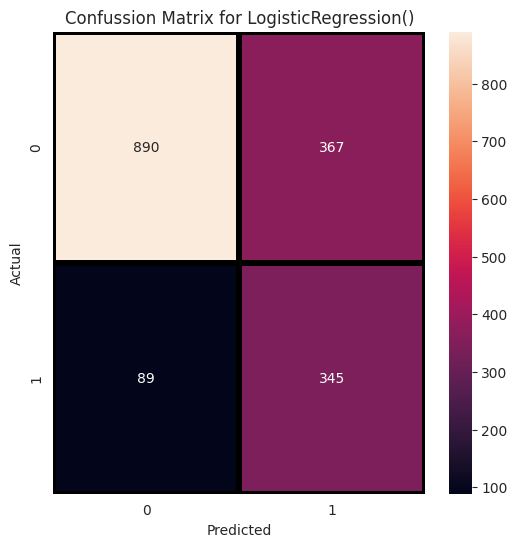

ROC AUC score = 0.8289248411659683
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

DecisionTreeClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1257
           1       0.45      0.53      0.48       434

    accuracy                           0.71      1691
   macro avg       0.64      0.65      0.64      1691
weighted avg       0.73      0.71      0.72      1691



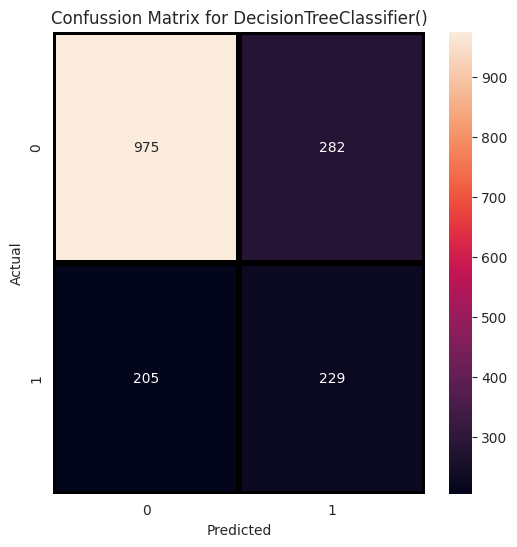

ROC AUC score = 0.6514651591639813
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

RandomForestClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1257
           1       0.52      0.62      0.57       434

    accuracy                           0.76      1691
   macro avg       0.69      0.71      0.70      1691
weighted avg       0.77      0.76      0.76      1691



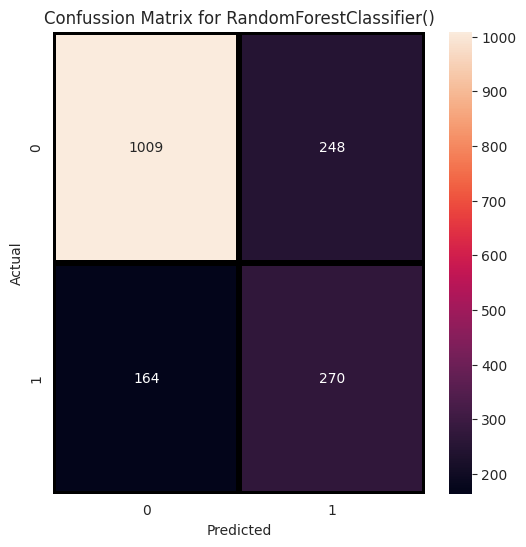

ROC AUC score = 0.8119306079503168
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

GaussianNB()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1257
           1       0.46      0.79      0.58       434

    accuracy                           0.70      1691
   macro avg       0.68      0.73      0.68      1691
weighted avg       0.79      0.70      0.72      1691



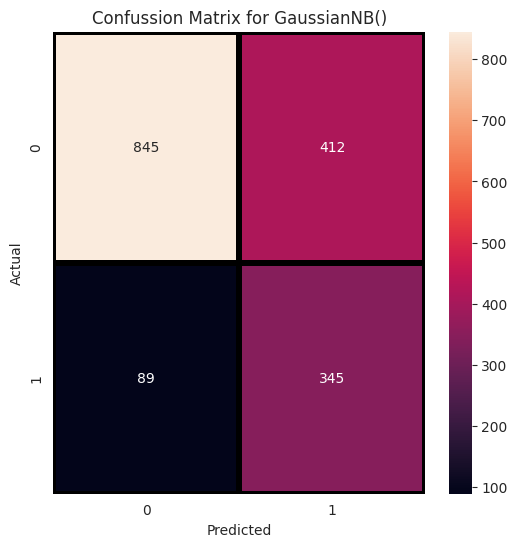

ROC AUC score = 0.8111882215354385
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

KNeighborsClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.87      0.70      0.78      1257
           1       0.45      0.71      0.55       434

    accuracy                           0.70      1691
   macro avg       0.66      0.70      0.66      1691
weighted avg       0.76      0.70      0.72      1691



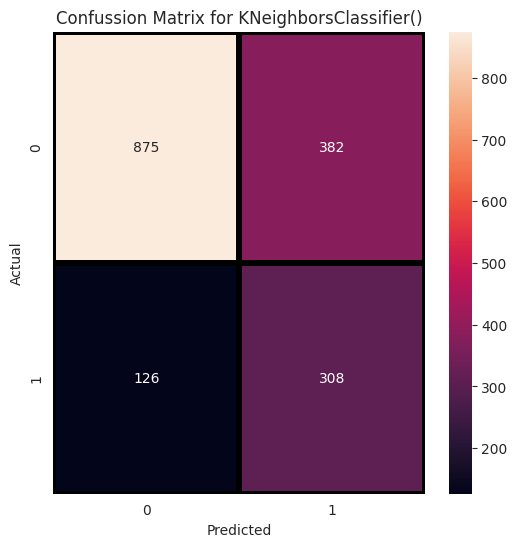

ROC AUC score = 0.7591918436479219
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

SVC(probability=True)
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1257
           1       0.47      0.82      0.60       434

    accuracy                           0.71      1691
   macro avg       0.69      0.75      0.69      1691
weighted avg       0.80      0.71      0.73      1691



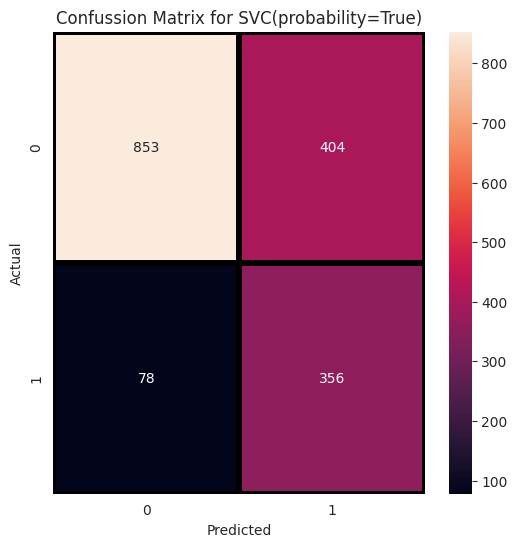

ROC AUC score = 0.8152264370218023
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

AdaBoostClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.92      0.69      0.79      1257
           1       0.48      0.82      0.60       434

    accuracy                           0.72      1691
   macro avg       0.70      0.75      0.70      1691
weighted avg       0.80      0.72      0.74      1691



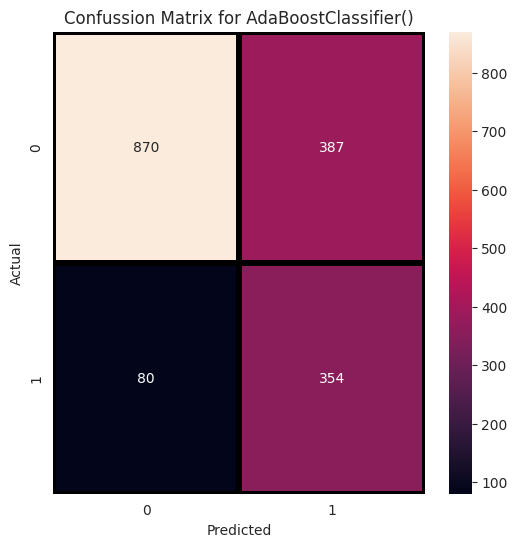

ROC AUC score = 0.8339657365756372
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

GradientBoostingClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1257
           1       0.49      0.81      0.61       434

    accuracy                           0.74      1691
   macro avg       0.70      0.76      0.71      1691
weighted avg       0.81      0.74      0.75      1691



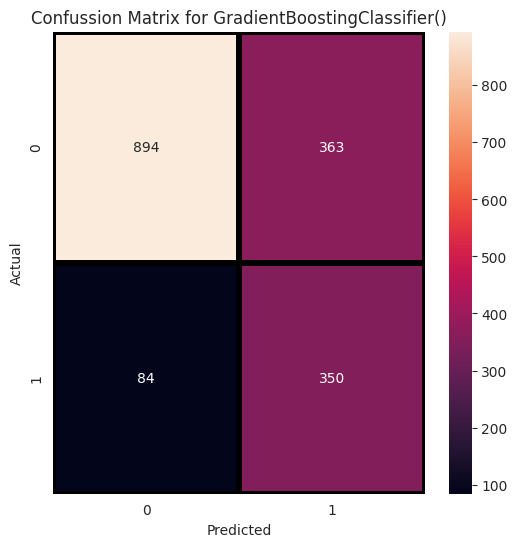

ROC AUC score = 0.8393100022363243
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Classification report for testing dat

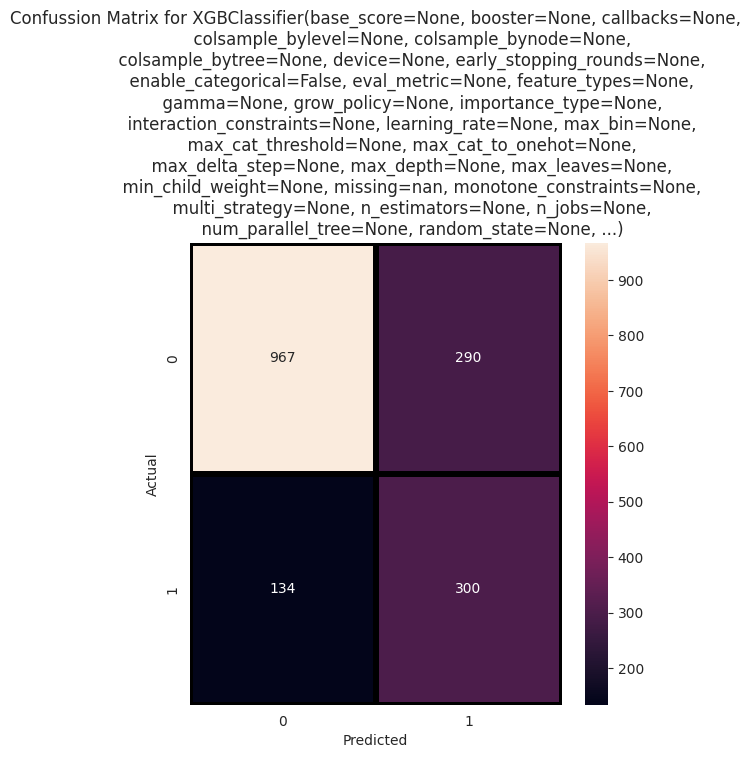

ROC AUC score = 0.8167322899596362
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Learning rate set to 0.024659
0:	learn: 0.6819576	total: 9.37ms	remaining: 9.36s
1:	learn: 0.6718771	total: 15.1ms	remaining: 7.54s
2:	learn: 0.6615001	total: 18.9ms	remaining: 6.29s
3:	learn: 0.6524931	total: 23ms	remaining: 5.72s
4:	learn: 0.6442685	total: 27ms	remaining: 5.37s
5:	learn: 0.6363324	total: 31ms	remaining: 5.13s
6:	learn: 0.6288855	total: 35.2ms	remaining: 5s
7:	learn: 0.6213223	total: 39.6ms	remaining: 4.91s
8:	learn: 0.6143468	total: 44ms	remaining: 4.85s
9:	learn: 0.6077279	total: 48.4ms	remaining: 4.79s
10:	learn: 0.6020079	total: 52.4ms	remaining: 4.71s
11:	learn: 0.5961851	total: 56.4ms	remaining: 4.64s
12:	learn: 0.5905004	total: 60.6ms	remaining: 4.6s
13:	learn: 0.5855976	total: 64.4ms	remaining: 4.54s
14:	learn: 0.5824045	total: 68.4ms	remaining: 4.49s
15:	lea

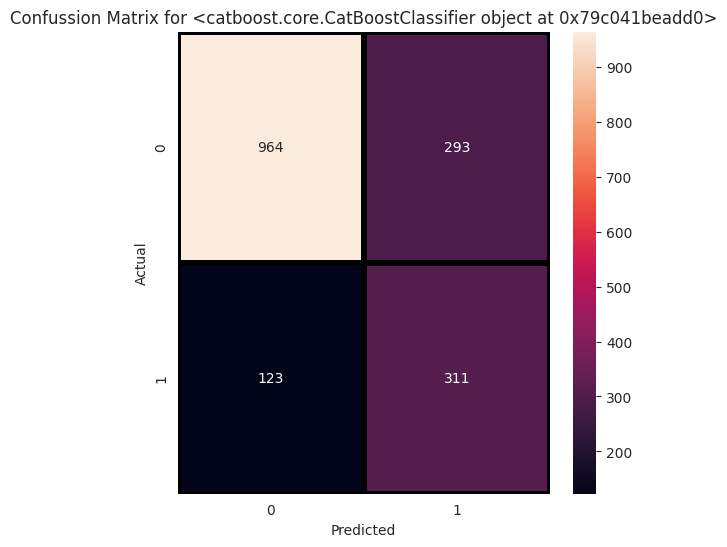

ROC AUC score = 0.8313133090637131
------------------------------------------------------------------------------------------------------------------------------------------------------------------------



In [ ]:
# model train with ADASYN balanced data
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB(), KNeighborsClassifier(), SVC(probability = True), AdaBoostClassifier(), GradientBoostingClassifier(), XGBClassifier(), CatBoostClassifier()]


modelTraining(models, X_train_ad, y_train_ad, X_test, y_test)

LogisticRegression()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1257
           1       0.51      0.77      0.61       434

    accuracy                           0.75      1691
   macro avg       0.70      0.75      0.71      1691
weighted avg       0.80      0.75      0.76      1691



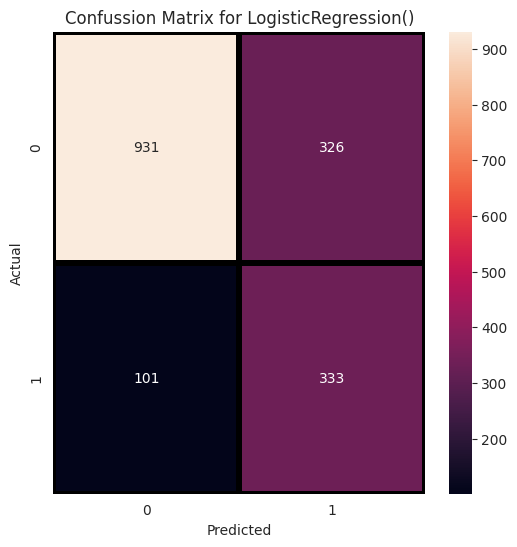

ROC AUC score = 0.8331371966755752
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

DecisionTreeClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1257
           1       0.46      0.61      0.52       434

    accuracy                           0.72      1691
   macro avg       0.65      0.68      0.66      1691
weighted avg       0.75      0.72      0.73      1691



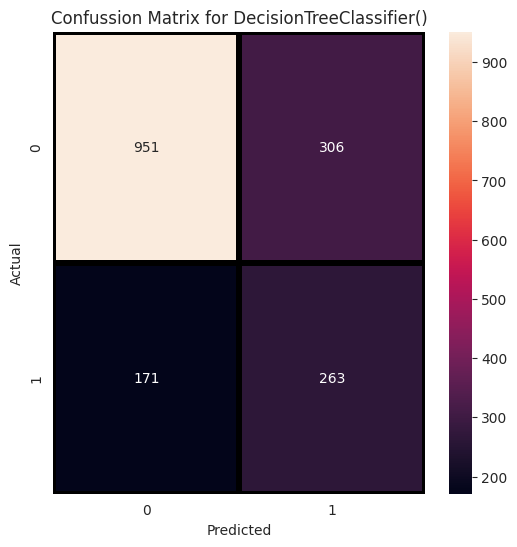

ROC AUC score = 0.6819919052384985
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

RandomForestClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1257
           1       0.54      0.58      0.56       434

    accuracy                           0.77      1691
   macro avg       0.70      0.70      0.70      1691
weighted avg       0.77      0.77      0.77      1691



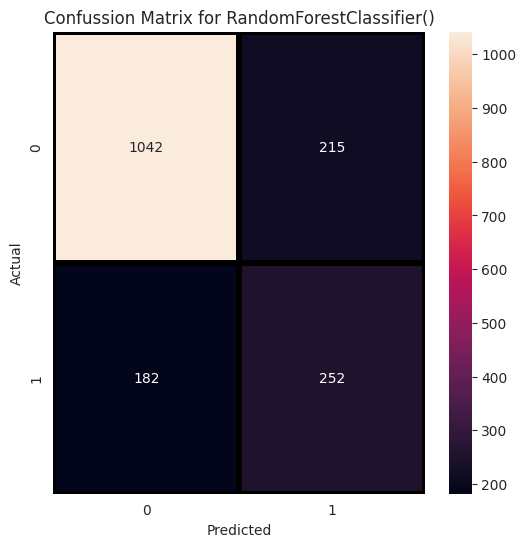

ROC AUC score = 0.8177377194622556
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

GaussianNB()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1257
           1       0.47      0.77      0.59       434

    accuracy                           0.72      1691
   macro avg       0.69      0.74      0.69      1691
weighted avg       0.79      0.72      0.74      1691



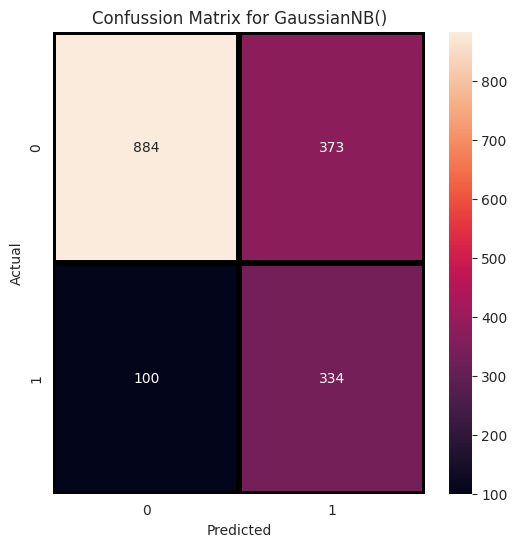

ROC AUC score = 0.8118902807870395
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

KNeighborsClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.87      0.72      0.79      1257
           1       0.46      0.68      0.55       434

    accuracy                           0.71      1691
   macro avg       0.66      0.70      0.67      1691
weighted avg       0.76      0.71      0.73      1691



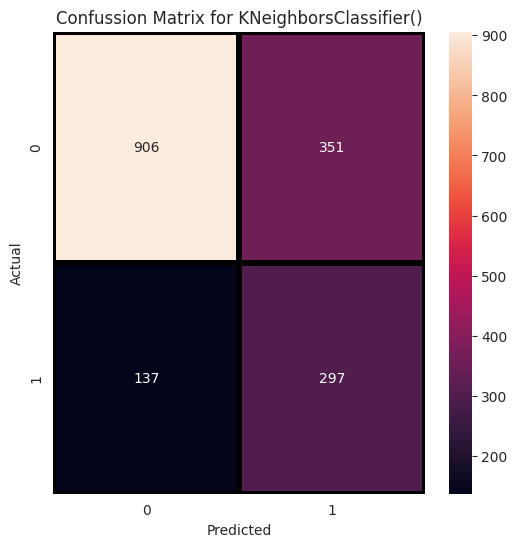

ROC AUC score = 0.7703661339815009
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

SVC(probability=True)
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1257
           1       0.50      0.76      0.61       434

    accuracy                           0.75      1691
   macro avg       0.70      0.75      0.71      1691
weighted avg       0.80      0.75      0.76      1691



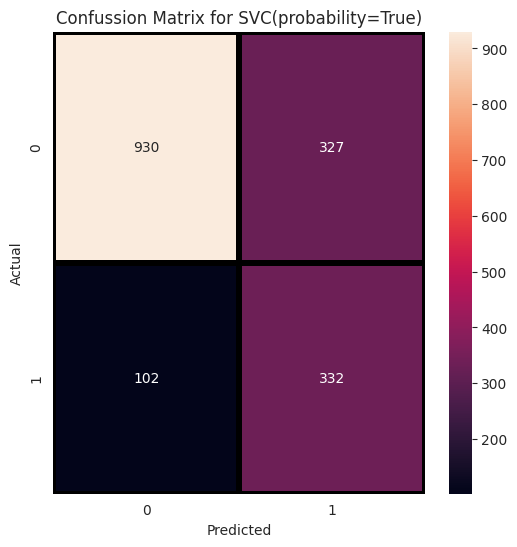

ROC AUC score = 0.823167222081688
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

AdaBoostClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1257
           1       0.50      0.76      0.60       434

    accuracy                           0.74      1691
   macro avg       0.70      0.75      0.70      1691
weighted avg       0.80      0.74      0.75      1691



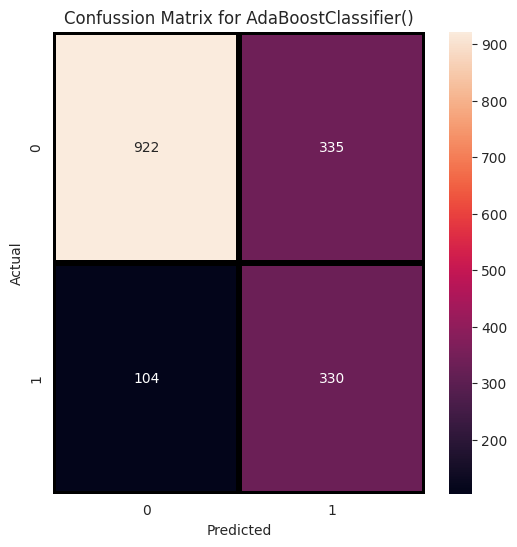

ROC AUC score = 0.833805344448966
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

GradientBoostingClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.91      0.76      0.82      1257
           1       0.52      0.77      0.62       434

    accuracy                           0.76      1691
   macro avg       0.71      0.76      0.72      1691
weighted avg       0.81      0.76      0.77      1691



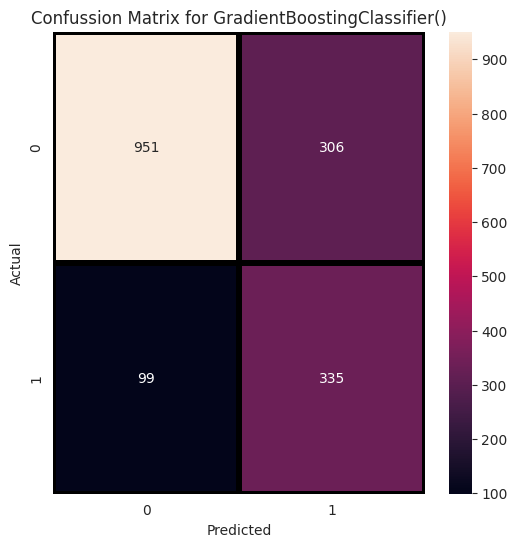

ROC AUC score = 0.8392898386546859
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Classification report for testing dat

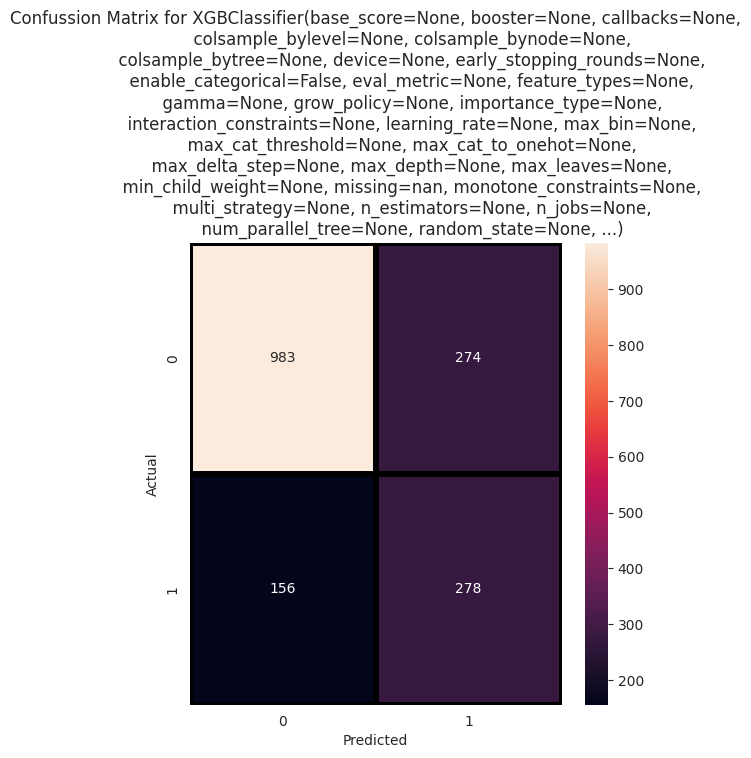

ROC AUC score = 0.8109865857190517
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Learning rate set to 0.024812
0:	learn: 0.6800734	total: 4.91ms	remaining: 4.9s
1:	learn: 0.6673308	total: 9.55ms	remaining: 4.77s
2:	learn: 0.6558204	total: 13.5ms	remaining: 4.48s
3:	learn: 0.6450042	total: 17.2ms	remaining: 4.29s
4:	learn: 0.6345823	total: 21.1ms	remaining: 4.19s
5:	learn: 0.6251698	total: 25ms	remaining: 4.14s
6:	learn: 0.6166089	total: 29ms	remaining: 4.11s
7:	learn: 0.6080625	total: 32.9ms	remaining: 4.08s
8:	learn: 0.6019331	total: 37.3ms	remaining: 4.11s
9:	learn: 0.5936602	total: 41.3ms	remaining: 4.08s
10:	learn: 0.5864322	total: 45.2ms	remaining: 4.07s
11:	learn: 0.5798868	total: 49.6ms	remaining: 4.09s
12:	learn: 0.5730353	total: 54ms	remaining: 4.1s
13:	learn: 0.5671790	total: 58.4ms	remaining: 4.11s
14:	learn: 0.5631412	total: 62.6ms	remaining: 4.11s
15:

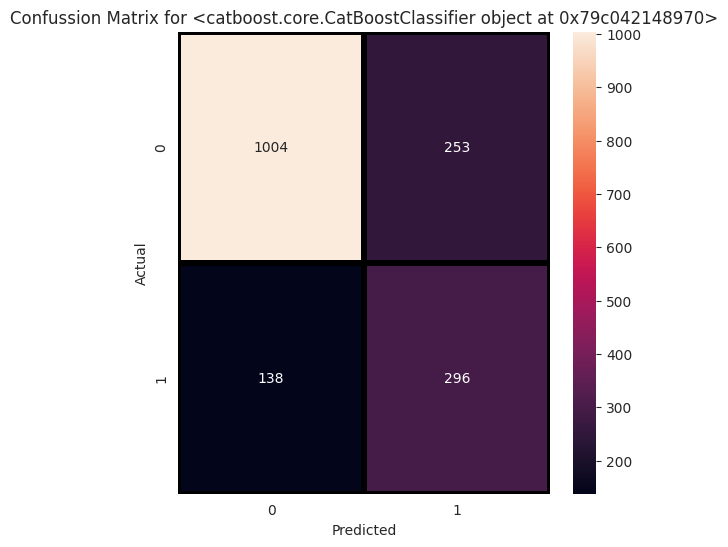

ROC AUC score = 0.8337127752787157
------------------------------------------------------------------------------------------------------------------------------------------------------------------------



In [ ]:
# model train with SMOTE balanced data
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB(), KNeighborsClassifier(), SVC(probability = True), AdaBoostClassifier(), GradientBoostingClassifier(), XGBClassifier(), CatBoostClassifier()]


modelTraining(models, X_train_sm, y_train_sm, X_test, y_test)

Before balancing classes, AdaBoostClassifier, RandomForestClassifier and CatBoost demonstrates low Type 1 and Type 2 errors, making it a favorable estimator. Let's proceed with tuning its hyperparameters for optimal performance.


Among the classifiers tested, the *CatBoostClassifier* and *XGBClassifier*
yielded the highest ROC AUC score, indicating superior performance compared to the RandomForestClassifier."


# **HYPERPARAMETER TUNING**






In [ ]:
# HYPERPARAMETER TUNING FOR CatBoostClassifier with imbalanced data
param_grid = {
    "iterations": [100, 200, 300],
    "learning_rate": [0.01, 0.1],
    'random_strength': [0.1, 0.5, 1],
    'l2_leaf_reg': [1, 3, 5],
    "depth": [3, 6, 9]
}

model= CatBoostClassifier()
gridsearch = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')

gridsearch.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
200:	learn: 0.3807364	total: 3.59s	remaining: 1.77s
201:	learn: 0.3803661	total: 3.6s	remaining: 1.75s
202:	learn: 0.3802023	total: 3.61s	remaining: 1.73s
203:	learn: 0.3799822	total: 3.62s	remaining: 1.71s
204:	learn: 0.3795958	total: 3.64s	remaining: 1.69s
205:	learn: 0.3794096	total: 3.65s	remaining: 1.67s
206:	learn: 0.3793633	total: 3.65s	remaining: 1.64s
207:	learn: 0.3791331	total: 3.68s	remaining: 1.63s
208:	learn: 0.3788129	total: 3.69s	remaining: 1.61s
209:	learn: 0.3784197	total: 3.7s	remaining: 1.59s
210:	learn: 0.3780848	total: 3.72s	remaining: 1.57s
211:	learn: 0.3778659	total: 3.73s	remaining: 1.55s
212:	learn: 0.3775209	total: 3.74s	remaining: 1.53s
213:	learn: 0.3771080	total: 3.76s	remaining: 1.51s
214:	learn: 0.3767938	total: 3.77s	remaining: 1.49s
215:	learn: 0.3766305	total: 3.79s	remaining: 1.47s
216:	learn: 0.3762496	total: 3.81s	remaining: 1.46s
217:	learn: 0.3759462	total: 3.82s	remaining: 1.44s
218:	learn: 0.3

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x79c0418bb4c0>,
             param_grid={'depth': [3, 6, 9], 'iterations': [100, 200, 300],
                         'l2_leaf_reg': [1, 3, 5], 'learning_rate': [0.01, 0.1],
                         'random_strength': [0.1, 0.5, 1]},
             scoring='roc_auc')

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x79c0418bb4c0>,
             param_grid={'depth': [3, 6, 9], 'iterations': [100, 200, 300],
                         'l2_leaf_reg': [1, 3, 5], 'learning_rate': [0.01, 0.1],
                         'random_strength': [0.1, 0.5, 1]},
             scoring='roc_auc')
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1257
           1       0.67      0.50      0.57       434

    accuracy                           0.81      1691
   macro avg       0.75      0.71      0.72      1691
weighted avg       0.80      0.81      0.80      1691



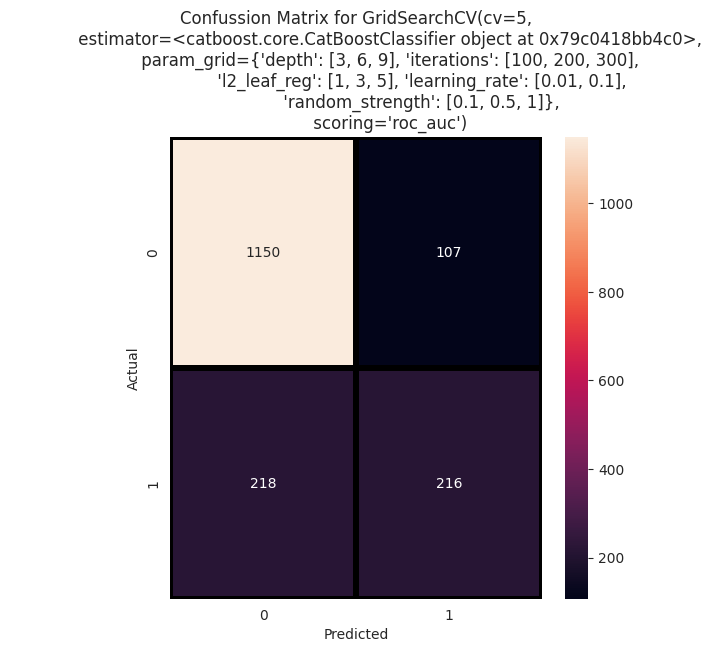

ROC AUC score = 0.8440722736088044
------------------------------------------------------------------------------------------------------------------------------------------------------------------------



In [ ]:
eveluating(gridsearch, X_test, y_test)

In [ ]:
# HYPERPARAMETER TUNING FOR XGBClassifier with imbalanced data
param_grid = {
    "learning_rate": [0.1, 0.01, 0.001],
    "max_depth": [5, 8, 12, 15, 20],
    "n_estimators": [100, 500, 1000],
    "colsample_bytree": [0.5, 0.7, 1]
}

model= XGBClassifier()
gridsearch = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')

gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.7, 1],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [5, 8, 12, 15, 20],
                         'n_estimators': [100, 500, 1000]},
             scoring='roc_auc')

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None

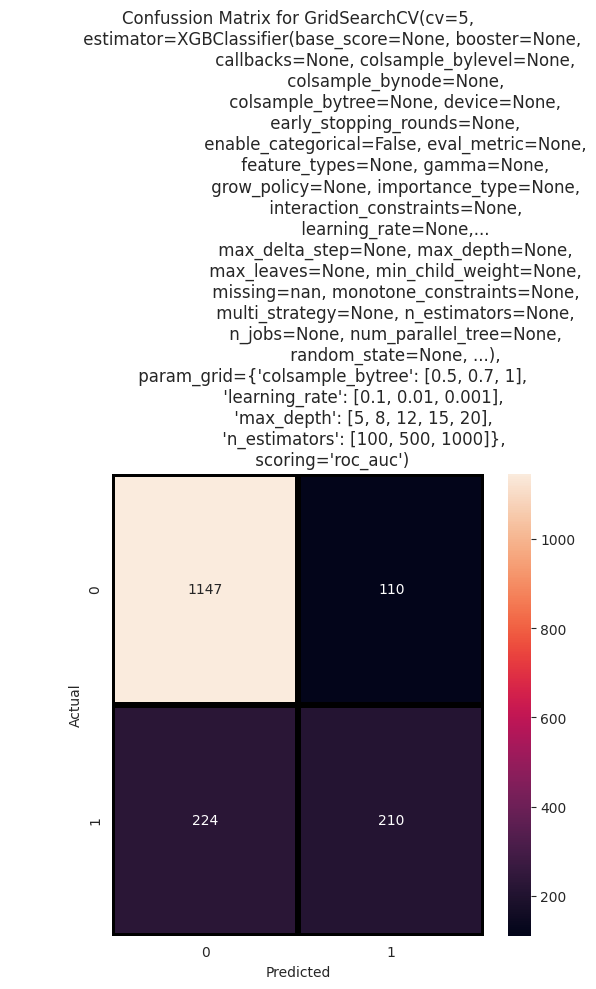

ROC AUC score = 0.841181549222969
------------------------------------------------------------------------------------------------------------------------------------------------------------------------



In [ ]:
eveluating(gridsearch, X_test, y_test)

# **Conclusion**

The use of techniques such as SMOTE, ADASYN, and random oversampling is aimed at addressing imbalances in datasets. However, it's important to note that while these methods can help mitigate class imbalance, they may also have an impact on the overall performance of machine learning models, potentially leading to a reduction in their effectiveness.

CatBoostClassifier demonstrates the highest ROC AUC of 0.8440722736088044 before implementing class balancing. Before balancing classes, the XGBClassifier achieves an accuracy of approximately 0.84.

Customer churn poses a significant threat to a firm's profitability. To effectively combat churn, it is crucial for a company to have a deep understanding of its customers. This involves pinpointing customers at risk of churning and actively working to enhance their satisfaction. A primary focus should be on elevating customer service to the forefront of strategic priorities. Additionally, fostering customer loyalty through personalized experiences and specialized services proves to be an effective strategy for reducing churn.

One proactive approach involves surveying customers who have already churned to gain insights into their reasons for leaving. This information can then be utilized to implement preventative measures and avoid future instances of customer churn.